# Quantum Transpiler Performance Comparison

This notebook demonstrates how to use the performance metrics module to compare custom transpilation passes with Qiskit's default transpiler.

## 1. Import Required Modules

In [1]:
# Add the src directory to Python path
import sys
import os
sys.path.append(os.path.join(os.getcwd(), 'src'))

# Import our custom modules
from performance_metrics import TranspilerBenchmark, create_performance_comparison
from test_circuit_generator import generate_all_test_circuits, get_qft_circuit, get_random_circuit
from custom_pass import get_custom_pass_manager, MyOptimizationPass

# Import other required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from qiskit import QuantumCircuit

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("All modules imported successfully!")

All modules imported successfully!


## 2. Generate Test Circuits

In [2]:
# Generate test circuits
test_circuits = generate_all_test_circuits(max_qubits_for_backend=20)

print(f"Generated {len(test_circuits)} test circuits:")
for i, qc in enumerate(test_circuits):
    print(f"  {i+1}. {qc.name} - {qc.num_qubits} qubits, depth {qc.depth()}")

Generated 45 test circuits:
  1. EfficientSU2_2Q_R1_linear - 2 qubits, depth 5
  2. EfficientSU2_3Q_R1_linear - 3 qubits, depth 6
  3. EfficientSU2_4Q_R1_linear - 4 qubits, depth 7
  4. EfficientSU2_4Q_R2_full - 4 qubits, depth 15
  5. EfficientSU2_5Q_R1_linear - 5 qubits, depth 8
  6. EfficientSU2_5Q_R2_full - 5 qubits, depth 18
  7. EfficientSU2_6Q_R1_linear - 6 qubits, depth 9
  8. EfficientSU2_6Q_R2_full - 6 qubits, depth 21
  9. EfficientSU2_7Q_R1_linear - 7 qubits, depth 10
  10. EfficientSU2_7Q_R2_full - 7 qubits, depth 24
  11. EfficientSU2_8Q_R1_linear - 8 qubits, depth 11
  12. EfficientSU2_8Q_R2_full - 8 qubits, depth 27
  13. EfficientSU2_9Q_R1_linear - 9 qubits, depth 12
  14. EfficientSU2_9Q_R2_full - 9 qubits, depth 30
  15. EfficientSU2_10Q_R1_linear - 10 qubits, depth 13
  16. EfficientSU2_10Q_R2_full - 10 qubits, depth 33
  17. EfficientSU2_11Q_R1_linear - 11 qubits, depth 14
  18. EfficientSU2_11Q_R2_full - 11 qubits, depth 36
  19. EfficientSU2_12Q_R1_linear - 12 qu

## 3. Create and Run Benchmark

### Option A: Quick Start with Convenience Function

If you just want to run a complete benchmark quickly, you can use the convenience function:

In [3]:
# Quick benchmark using convenience function (FakeTorino is default)
# Uncomment the line below to run a quick benchmark
# quick_benchmark = create_performance_comparison(max_qubits=3, save_results=True)

### Option B: Step-by-Step Analysis

For more detailed control and analysis, create the benchmark instance manually:

In [ ]:
# Create benchmark instance - FakeTorino is now the default backend
benchmark = TranspilerBenchmark(max_qubits=20)

print(f"Backend: {benchmark.backend.name}")
print(f"Coupling map: {benchmark.backend.coupling_map}")
print(f"Basis gates: {benchmark.backend.basis_gates}")
print(f"Number of qubits: {benchmark.backend.num_qubits}")

Backend: fake_torino
Coupling map: [[0, 1], [0, 15], [1, 0], [1, 2], [2, 1], [2, 3], [3, 2], [3, 4], [4, 3], [4, 5], [4, 16], [5, 4], [5, 6], [6, 5], [6, 7], [7, 6], [7, 8], [8, 7], [8, 9], [8, 17], [9, 8], [9, 10], [10, 9], [10, 11], [11, 10], [11, 12], [12, 11], [12, 13], [12, 18], [13, 12], [13, 14], [14, 13], [15, 0], [15, 19], [16, 4], [16, 23], [17, 8], [17, 27], [18, 12], [18, 31], [19, 15], [19, 20], [20, 19], [20, 21], [21, 20], [21, 22], [21, 34], [22, 21], [22, 23], [23, 16], [23, 22], [23, 24], [24, 23], [24, 25], [25, 24], [25, 26], [25, 35], [26, 25], [26, 27], [27, 17], [27, 26], [27, 28], [28, 27], [28, 29], [29, 28], [29, 30], [29, 36], [30, 29], [30, 31], [31, 18], [31, 30], [31, 32], [32, 31], [32, 33], [33, 32], [33, 37], [34, 21], [34, 40], [35, 25], [35, 44], [36, 29], [36, 48], [37, 33], [37, 52], [38, 39], [38, 53], [39, 38], [39, 40], [40, 34], [40, 39], [40, 41], [41, 40], [41, 42], [42, 41], [42, 43], [42, 54], [43, 42], [43, 44], [44, 35], [44, 43], [44, 45]

**Note about FakeTorino Backend:**
- Uses CZ (controlled-Z) gates instead of CX (CNOT) gates as the native two-qubit gate
- This provides different optimization opportunities compared to CX-based backends
- Your custom pass may show different performance characteristics on this backend

In [5]:
# Run the complete benchmark
results = benchmark.run_full_benchmark(test_circuits)

Starting benchmark with 45 circuits on FakeTorino
Backend coupling map: [[0, 1], [0, 15], [1, 0], [1, 2], [2, 1], [2, 3], [3, 2], [3, 4], [4, 3], [4, 5], [4, 16], [5, 4], [5, 6], [6, 5], [6, 7], [7, 6], [7, 8], [8, 7], [8, 9], [8, 17], [9, 8], [9, 10], [10, 9], [10, 11], [11, 10], [11, 12], [12, 11], [12, 13], [12, 18], [13, 12], [13, 14], [14, 13], [15, 0], [15, 19], [16, 4], [16, 23], [17, 8], [17, 27], [18, 12], [18, 31], [19, 15], [19, 20], [20, 19], [20, 21], [21, 20], [21, 22], [21, 34], [22, 21], [22, 23], [23, 16], [23, 22], [23, 24], [24, 23], [24, 25], [25, 24], [25, 26], [25, 35], [26, 25], [26, 27], [27, 17], [27, 26], [27, 28], [28, 27], [28, 29], [29, 28], [29, 30], [29, 36], [30, 29], [30, 31], [31, 18], [31, 30], [31, 32], [32, 31], [32, 33], [33, 32], [33, 37], [34, 21], [34, 40], [35, 25], [35, 44], [36, 29], [36, 48], [37, 33], [37, 52], [38, 39], [38, 53], [39, 38], [39, 40], [40, 34], [40, 39], [40, 41], [41, 40], [41, 42], [42, 41], [42, 43], [42, 54], [43, 42], [

## 4. Display Results Summary

In [6]:
# Print formatted summary
benchmark.print_summary()


 TRANSPILER BENCHMARK SUMMARY

Circuit: EfficientSU2_2Q_R1_linear
--------------------------------------------------
Original:    Depth=  5, Gates=  9, CX=  1
Custom:      Depth= 19 (-14), Gates= 31 (-22), CX=  0, Time=0.0111s
Qiskit L0:   Depth= 19 (-14), Gates= 31 (-22), CX=  0, Time=0.0150s
Qiskit L1:   Depth= 16 (-11), Gates= 26 (-17), CX=  0, Time=0.0105s
Qiskit L2:   Depth= 14 (-9), Gates= 24 (-15), CX=  0, Time=0.0109s
Qiskit L3:   Depth= 14 (-9), Gates= 24 (-15), CX=  0, Time=0.0156s

Circuit: EfficientSU2_3Q_R1_linear
--------------------------------------------------
Original:    Depth=  6, Gates= 14, CX=  2
Custom:      Depth= 23 (-17), Gates= 50 (-36), CX=  0, Time=0.0075s
Qiskit L0:   Depth= 23 (-17), Gates= 50 (-36), CX=  0, Time=0.0057s
Qiskit L1:   Depth= 20 (-14), Gates= 43 (-29), CX=  0, Time=0.0080s
Qiskit L2:   Depth= 17 (-11), Gates= 39 (-25), CX=  0, Time=0.0103s
Qiskit L3:   Depth= 17 (-11), Gates= 39 (-25), CX=  0, Time=0.0197s

Circuit: EfficientSU2_4Q_R1_line

## 5. Generate and Display Summary Table

In [7]:
# Generate summary DataFrame
summary_df = benchmark.generate_summary_table()

# Display the table
print("Summary Table:")
display(summary_df)

Summary Table:


,Circuit,Original_Depth,Original_Gates,Original_CX,Custom_Depth,Custom_Gates,Custom_CX,Custom_Time,Qiskit_L0_Depth,Qiskit_L0_Gates,...,Qiskit_L1_CX,Qiskit_L1_Time,Qiskit_L2_Depth,Qiskit_L2_Gates,Qiskit_L2_CX,Qiskit_L2_Time,Qiskit_L3_Depth,Qiskit_L3_Gates,Qiskit_L3_CX,Qiskit_L3_Time
0,EfficientSU2_2Q_R1_linear,5,9,1,19,31,0,0.011084,19,31,...,0,0.010511,14,24,0,0.010920,14,24,0,0.015582
1,EfficientSU2_3Q_R1_linear,6,14,2,23,50,0,0.007548,23,50,...,0,0.008008,17,39,0,0.010289,17,39,0,0.019662
2,EfficientSU2_4Q_R1_linear,7,19,3,27,69,0,0.007684,27,69,...,0,0.007688,20,54,0,0.011068,20,54,0,0.023209
3,EfficientSU2_4Q_R2_full,15,36,12,79,164,0,0.011183,133,246,...,0,0.019668,67,118,0,0.022926,67,118,0,0.033003
4,EfficientSU2_5Q_R1_linear,8,24,4,31,88,0,0.008536,31,88,...,0,0.008029,23,69,0,0.010376,23,69,0,0.029383
5,EfficientSU2_5Q_R2_full,18,50,20,110,240,0,0.013404,186,374,...,0,0.018993,126,231,0,0.024491,135,235,0,0.038576
6,EfficientSU2_6Q_R1_linear,9,29,5,35,107,0,0.009964,35,107,...,0,0.008709,26,84,0,0.011855,26,84,0,0.035080
7,EfficientSU2_6Q_R2_full,21,66,30,159,338,0,0.017403,233,561,...,0,0.021811,189,381,0,0.024494,175,365,0,0.045236
8,EfficientSU2_7Q_R1_linear,10,34,6,39,126,0,0.010326,39,126,...,0,0.009313,29,99,0,0.012285,29,99,0,0.049096
9,EfficientSU2_7Q_R2_full,24,84,42,200,454,0,0.026314,289,807,...,0,0.025014,237,524,0,0.029445,256,553,0,0.057814


## 6. Create Visualizations

In [8]:
# Prepare data for visualization
viz_data = []

for _, row in summary_df.iterrows():
    circuit_name = row['Circuit']
    original_depth = row['Original_Depth']
    
    # Add custom transpiler data
    if row['Custom_Depth'] != 'Error':
        viz_data.append({
            'Circuit': circuit_name,
            'Method': 'Custom',
            'Depth': row['Custom_Depth'],
            'Gates': row['Custom_Gates'],
            'CX_Gates': row['Custom_CX'],
            'Time': row['Custom_Time'],
            'Depth_Improvement': original_depth - row['Custom_Depth']
        })
    
    # Add Qiskit transpiler data
    for level in [0, 1, 2, 3]:
        depth_col = f'Qiskit_L{level}_Depth'
        if row[depth_col] != 'Error':
            viz_data.append({
                'Circuit': circuit_name,
                'Method': f'Qiskit L{level}',
                'Depth': row[depth_col],
                'Gates': row[f'Qiskit_L{level}_Gates'],
                'CX_Gates': row[f'Qiskit_L{level}_CX'],
                'Time': row[f'Qiskit_L{level}_Time'],
                'Depth_Improvement': original_depth - row[depth_col]
            })

viz_df = pd.DataFrame(viz_data)
print(f"Prepared visualization data with {len(viz_df)} entries")

Prepared visualization data with 221 entries


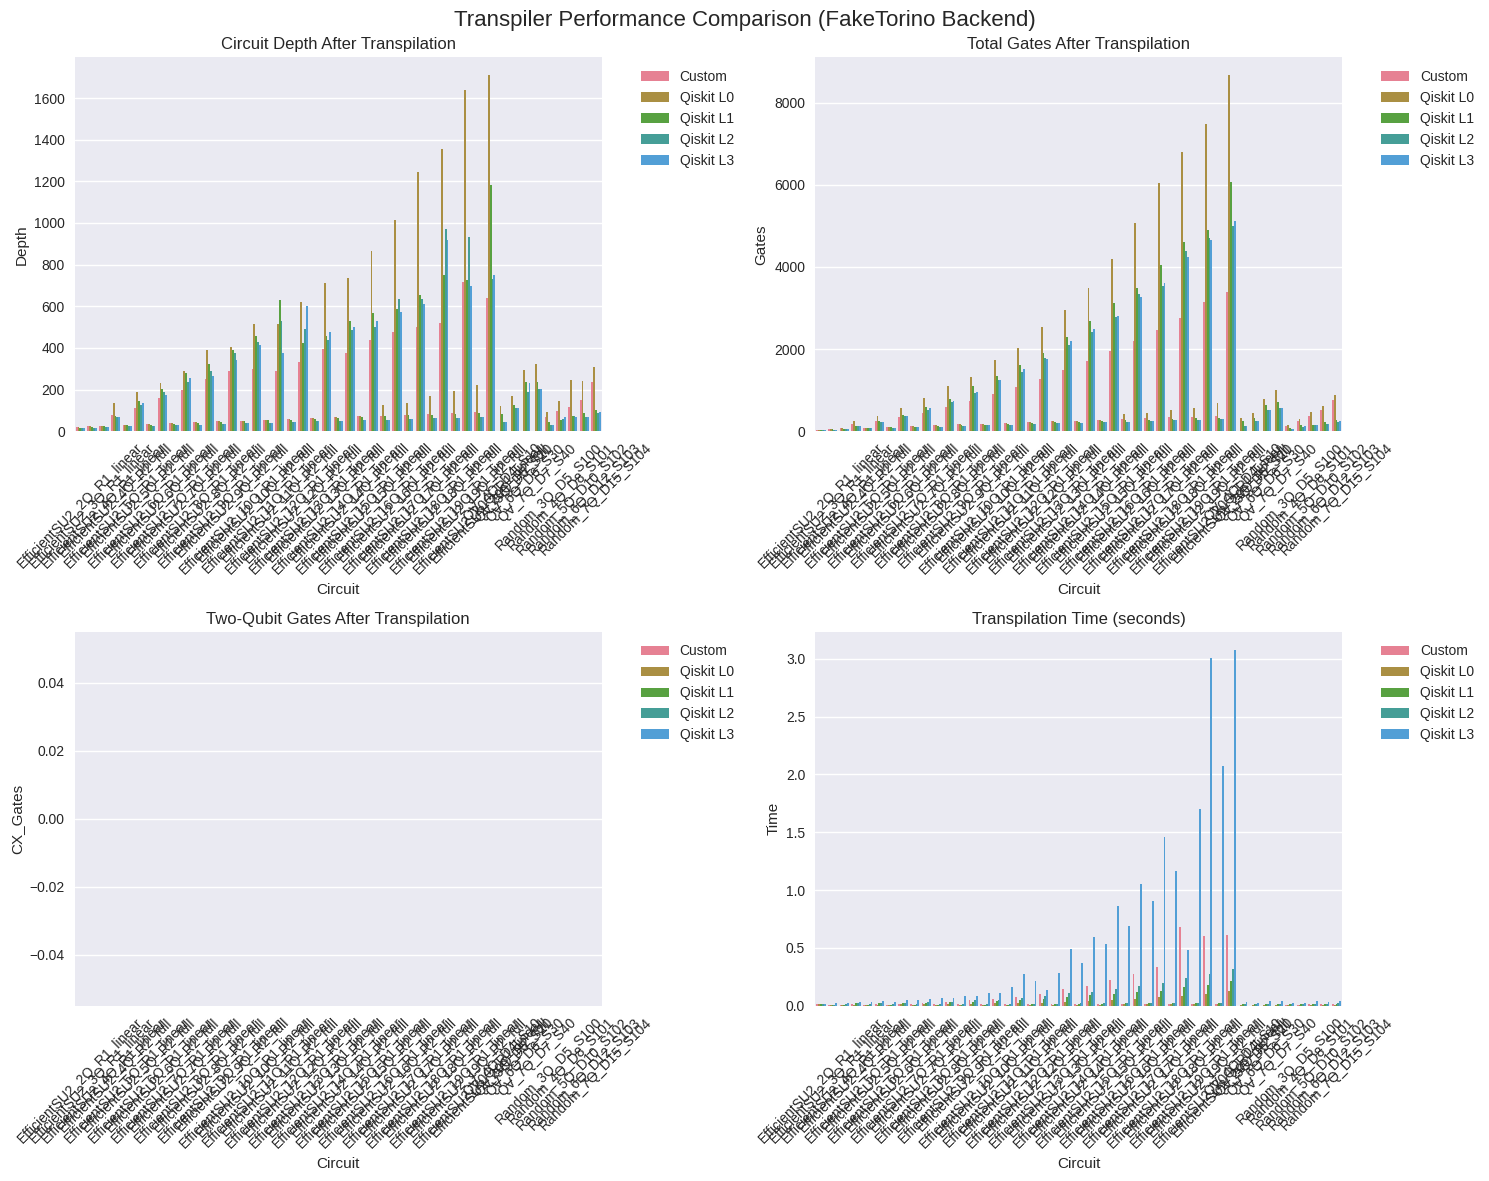

In [ ]:
# Create comprehensive comparison plots with improved styling
plt.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(20, 16))

# Create a 3x2 grid for better layout
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# Plot 1: Circuit Depth Comparison with improvement indicators
ax1 = fig.add_subplot(gs[0, 0])
sns.barplot(data=viz_df, x='Circuit', y='Depth', hue='Method', ax=ax1, palette='viridis')
ax1.set_title('Circuit Depth After Transpilation', fontsize=14, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)

# Plot 2: Total Gates Comparison
ax2 = fig.add_subplot(gs[0, 1])
sns.barplot(data=viz_df, x='Circuit', y='Gates', hue='Method', ax=ax2, palette='plasma')
ax2.set_title('Total Gates After Transpilation', fontsize=14, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True, alpha=0.3)

# Plot 3: Improvement Heatmap
ax3 = fig.add_subplot(gs[1, :])
improvement_pivot = viz_df.pivot(index='Circuit', columns='Method', values='Depth_Improvement')
sns.heatmap(improvement_pivot, annot=True, cmap='RdYlGn', center=0, ax=ax3, 
            cbar_kws={'label': 'Depth Improvement (Original - Transpiled)'})
ax3.set_title('Depth Improvement Heatmap (Green = Better)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Transpilation Method')
ax3.set_ylabel('Circuit')

# Plot 4: Transpilation Time Comparison
ax4 = fig.add_subplot(gs[2, 0])
sns.boxplot(data=viz_df, x='Method', y='Time', ax=ax4, palette='Set2')
ax4.set_title('Transpilation Time Distribution', fontsize=14, fontweight='bold')
ax4.tick_params(axis='x', rotation=45)
ax4.set_ylabel('Time (seconds)')
ax4.grid(True, alpha=0.3)

# Plot 5: Gate Efficiency (Depth vs Gates)
ax5 = fig.add_subplot(gs[2, 1])
scatter_colors = {'Custom': 'red', 'Qiskit L0': 'blue', 'Qiskit L1': 'green', 
                  'Qiskit L2': 'orange', 'Qiskit L3': 'purple'}
for method in viz_df['Method'].unique():
    method_data = viz_df[viz_df['Method'] == method]
    ax5.scatter(method_data['Gates'], method_data['Depth'], 
               label=method, alpha=0.7, s=60, c=scatter_colors.get(method, 'gray'))
ax5.set_xlabel('Total Gates')
ax5.set_ylabel('Circuit Depth')
ax5.set_title('Gate Efficiency (Lower-Left is Better)', fontsize=14, fontweight='bold')
ax5.legend()
ax5.grid(True, alpha=0.3)

plt.suptitle('Comprehensive Transpiler Performance Analysis (FakeTorino Backend)', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

In [ ]:
# Interactive Plotly Visualizations
try:
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    
    print("Creating interactive visualizations...")
    
    # Interactive scatter plot: Gates vs Depth with hover information
    fig_scatter = px.scatter(viz_df, x='Gates', y='Depth', color='Method', 
                           size='Time', hover_data=['Circuit', 'CX_Gates'],
                           title='Interactive: Gates vs Depth (Size = Transpilation Time)',
                           labels={'Gates': 'Total Gates', 'Depth': 'Circuit Depth'})
    fig_scatter.show()
    
    # Interactive bar chart with dropdown for different metrics
    fig_bar = go.Figure()
    
    # Add traces for each metric
    metrics = ['Depth', 'Gates', 'CX_Gates', 'Time']
    for metric in metrics:
        for method in viz_df['Method'].unique():
            method_data = viz_df[viz_df['Method'] == method]
            fig_bar.add_trace(go.Bar(
                x=method_data['Circuit'],
                y=method_data[metric],
                name=f'{method} - {metric}',
                visible=metric == 'Depth'  # Only show Depth initially
            ))
    
    # Create dropdown menu
    buttons = []
    for i, metric in enumerate(metrics):
        visibility = [False] * len(fig_bar.data)
        for j in range(i * len(viz_df['Method'].unique()), (i + 1) * len(viz_df['Method'].unique())):
            if j < len(visibility):
                visibility[j] = True
        
        buttons.append(dict(
            label=metric,
            method="update",
            args=[{"visible": visibility}]
        ))
    
    fig_bar.update_layout(
        updatemenus=[dict(
            buttons=buttons,
            direction="down",
            showactive=True,
            x=1.0,
            xanchor="left",
            y=1.15,
            yanchor="top"
        )],
        title="Interactive Comparison by Metric (Use Dropdown)",
        xaxis_title="Circuit",
        yaxis_title="Value"
    )
    fig_bar.show()
    
except ImportError:
    print("Plotly not available. Install with: pip install plotly")

In [ ]:
# Performance Radar Chart and Statistical Analysis
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Radar chart showing normalized performance across metrics
from math import pi
import numpy as np

# Calculate normalized scores for each method (lower is better for depth, gates, time)
methods = viz_df['Method'].unique()
metrics = ['Depth', 'Gates', 'Time']

# Normalize data (invert so higher is better for visualization)
radar_data = {}
for method in methods:
    method_data = viz_df[viz_df['Method'] == method]
    scores = []
    for metric in metrics:
        # Normalize to 0-1 scale and invert (so 1 is best)
        max_val = viz_df[metric].max()
        min_val = viz_df[metric].min()
        avg_score = method_data[metric].mean()
        if max_val != min_val:
            normalized_score = 1 - (avg_score - min_val) / (max_val - min_val)
        else:
            normalized_score = 1
        scores.append(normalized_score)
    radar_data[method] = scores

# Create radar chart
angles = [n / float(len(metrics)) * 2 * pi for n in range(len(metrics))]
angles += angles[:1]  # Complete the circle

ax_radar = axes[0]
ax_radar.set_theta_offset(pi / 2)
ax_radar.set_theta_direction(-1)
ax_radar.set_thetagrids(np.degrees(angles[:-1]), metrics)

colors = plt.cm.Set3(np.linspace(0, 1, len(methods)))
for i, method in enumerate(methods):
    values = radar_data[method] + radar_data[method][:1]  # Complete the circle
    ax_radar.plot(angles, values, 'o-', linewidth=2, label=method, color=colors[i])
    ax_radar.fill(angles, values, alpha=0.25, color=colors[i])

ax_radar.set_ylim(0, 1)
ax_radar.set_title('Performance Radar Chart\n(Larger Area = Better Performance)', 
                   fontsize=14, fontweight='bold', pad=20)
ax_radar.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

# Statistical comparison
ax_stats = axes[1]
improvement_stats = []
for method in methods:
    if method != 'Custom':  # Compare everything against original depth
        method_improvements = viz_df[viz_df['Method'] == method]['Depth_Improvement']
        improvement_stats.extend(method_improvements.tolist())

# Box plot of improvements
improvement_by_method = []
method_labels = []
for method in methods:
    method_improvements = viz_df[viz_df['Method'] == method]['Depth_Improvement']
    improvement_by_method.append(method_improvements.tolist())
    method_labels.append(method)

bp = ax_stats.boxplot(improvement_by_method, labels=method_labels, patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax_stats.set_title('Depth Improvement Distribution\n(Higher = Better)', 
                   fontsize=14, fontweight='bold')
ax_stats.set_ylabel('Depth Improvement')
ax_stats.tick_params(axis='x', rotation=45)
ax_stats.grid(True, alpha=0.3)
ax_stats.axhline(y=0, color='red', linestyle='--', alpha=0.7, label='No Improvement')
ax_stats.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Performance Summary Dashboard
def create_performance_dashboard(viz_df):
    """Create a comprehensive performance dashboard"""
    
    # Calculate key performance indicators
    methods = viz_df['Method'].unique()
    
    # Create dashboard figure
    fig = plt.figure(figsize=(20, 12))
    gs = fig.add_gridspec(3, 4, hspace=0.4, wspace=0.3)
    
    # 1. Win Rate Matrix (which method wins most often for each metric)
    ax1 = fig.add_subplot(gs[0, :2])
    win_matrix = []
    circuits = viz_df['Circuit'].unique()
    
    for circuit in circuits:
        circuit_data = viz_df[viz_df['Circuit'] == circuit]
        wins = []
        
        # For each metric, find the winner (lower is better)
        for metric in ['Depth', 'Gates', 'Time']:
            if not circuit_data.empty:
                best_idx = circuit_data[metric].idxmin()
                winner = circuit_data.loc[best_idx, 'Method']
                wins.append(winner)
        win_matrix.append(wins)
    
    # Create win count heatmap
    win_counts = {}
    for method in methods:
        win_counts[method] = [sum(1 for circuit_wins in win_matrix 
                                 for win in circuit_wins if win == method and 
                                 win_matrix.index(circuit_wins) < len(circuits))]
    
    # Method performance summary
    perf_summary = []
    for method in methods:
        method_data = viz_df[viz_df['Method'] == method]
        avg_depth_improvement = method_data['Depth_Improvement'].mean()
        avg_time = method_data['Time'].mean()
        total_circuits = len(method_data)
        
        perf_summary.append({
            'Method': method,
            'Avg_Depth_Improvement': avg_depth_improvement,
            'Avg_Time': avg_time,
            'Circuits_Tested': total_circuits
        })
    
    perf_df = pd.DataFrame(perf_summary)
    
    # Plot performance summary
    x_pos = np.arange(len(methods))
    bars1 = ax1.bar(x_pos - 0.2, perf_df['Avg_Depth_Improvement'], 0.4, 
                    label='Avg Depth Improvement', alpha=0.8, color='skyblue')
    
    # Add value labels on bars
    for bar in bars1:
        height = bar.get_height()
        ax1.annotate(f'{height:.1f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)
    
    ax1.set_xlabel('Transpilation Method')
    ax1.set_ylabel('Average Depth Improvement')
    ax1.set_title('Performance Summary: Average Depth Improvement', fontweight='bold')
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(methods, rotation=45)
    ax1.grid(True, alpha=0.3)
    ax1.axhline(y=0, color='red', linestyle='--', alpha=0.7)
    
    # 2. Time efficiency scatter
    ax2 = fig.add_subplot(gs[0, 2:])
    for method in methods:
        method_data = viz_df[viz_df['Method'] == method]
        ax2.scatter(method_data['Time'], method_data['Depth_Improvement'], 
                   label=method, alpha=0.7, s=80)
    
    ax2.set_xlabel('Transpilation Time (s)')
    ax2.set_ylabel('Depth Improvement')
    ax2.set_title('Time vs Quality Trade-off', fontweight='bold')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.axhline(y=0, color='red', linestyle='--', alpha=0.7)
    
    # 3. Circuit-wise comparison
    ax3 = fig.add_subplot(gs[1, :])
    circuit_comparison = viz_df.pivot(index='Circuit', columns='Method', values='Depth')
    sns.heatmap(circuit_comparison, annot=True, cmap='YlOrRd', ax=ax3,
                cbar_kws={'label': 'Circuit Depth'})
    ax3.set_title('Circuit Depth by Method (Lower is Better)', fontweight='bold')
    
    # 4. Performance ranking
    ax4 = fig.add_subplot(gs[2, :2])
    
    # Calculate overall ranking based on multiple metrics
    ranking_scores = []
    for method in methods:
        method_data = viz_df[viz_df['Method'] == method]
        
        # Normalize metrics (lower is better, so invert)
        depth_score = 1 / (method_data['Depth'].mean() + 1)
        gates_score = 1 / (method_data['Gates'].mean() + 1)
        time_score = 1 / (method_data['Time'].mean() + 0.001)  # Avoid division by zero
        
        # Weighted overall score (you can adjust weights)
        overall_score = 0.5 * depth_score + 0.3 * gates_score + 0.2 * time_score
        ranking_scores.append((method, overall_score))
    
    # Sort by score
    ranking_scores.sort(key=lambda x: x[1], reverse=True)
    
    methods_ranked = [item[0] for item in ranking_scores]
    scores_ranked = [item[1] for item in ranking_scores]
    
    bars = ax4.barh(methods_ranked, scores_ranked, color=plt.cm.viridis(np.linspace(0, 1, len(methods_ranked))))
    ax4.set_xlabel('Overall Performance Score')
    ax4.set_title('Overall Method Ranking\n(Higher = Better)', fontweight='bold')
    
    # Add score labels
    for i, (bar, score) in enumerate(zip(bars, scores_ranked)):
        ax4.text(score + max(scores_ranked)*0.01, bar.get_y() + bar.get_height()/2, 
                f'{score:.3f}', va='center', fontsize=10)
    
    # 5. Statistical significance test results
    ax5 = fig.add_subplot(gs[2, 2:])
    
    # Calculate improvement statistics
    improvement_stats = []
    for method in methods:
        method_data = viz_df[viz_df['Method'] == method]
        improvements = method_data['Depth_Improvement']
        
        improvement_stats.append({
            'Method': method,
            'Mean': improvements.mean(),
            'Std': improvements.std(),
            'Min': improvements.min(),
            'Max': improvements.max(),
            'Positive_Rate': (improvements > 0).mean() * 100
        })
    
    stats_df = pd.DataFrame(improvement_stats)
    
    # Plot positive improvement rate
    bars = ax5.bar(stats_df['Method'], stats_df['Positive_Rate'], 
                   color=plt.cm.RdYlGn(stats_df['Positive_Rate']/100))
    ax5.set_ylabel('Positive Improvement Rate (%)')
    ax5.set_title('Success Rate: % of Circuits Improved', fontweight='bold')
    ax5.tick_params(axis='x', rotation=45)
    
    # Add percentage labels
    for bar, rate in zip(bars, stats_df['Positive_Rate']):
        ax5.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                f'{rate:.1f}%', ha='center', va='bottom', fontsize=10)
    
    plt.suptitle('Comprehensive Transpiler Performance Dashboard', 
                 fontsize=18, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.show()
    
    return stats_df

# Create the dashboard
print("Creating comprehensive performance dashboard...")
performance_stats = create_performance_dashboard(viz_df)

print("\nDetailed Performance Statistics:")
print(performance_stats.round(3))

## 7. Save Results

In [10]:
# Save results to CSV with backend-specific naming
backend_name = benchmark.backend_name
benchmark.save_results(f"transpiler_benchmark_{backend_name}_results.csv")

# Save the visualization data as well
viz_df.to_csv(f"transpiler_visualization_{backend_name}_data.csv", index=False)

print("Results saved successfully!")
print("Files created:")
print(f"  - transpiler_benchmark_{backend_name}_results.csv")
print(f"  - transpiler_visualization_{backend_name}_data.csv")

Results saved to transpiler_benchmark_FakeTorino_results.csv
Results saved successfully!
Files created:
  - transpiler_benchmark_FakeTorino_results.csv
  - transpiler_visualization_FakeTorino_data.csv


## 8. Quick Analysis Example

In [11]:
# Example: Compare custom transpiler vs best Qiskit level
analysis_results = []

for circuit_name in summary_df['Circuit'].unique():
    circuit_data = summary_df[summary_df['Circuit'] == circuit_name].iloc[0]
    
    custom_depth = circuit_data['Custom_Depth']
    if custom_depth != 'Error':
        # Find best Qiskit result
        qiskit_depths = []
        for level in [0, 1, 2, 3]:
            depth = circuit_data[f'Qiskit_L{level}_Depth']
            if depth != 'Error':
                qiskit_depths.append(depth)
        
        if qiskit_depths:
            best_qiskit_depth = min(qiskit_depths)
            improvement = best_qiskit_depth - custom_depth
            
            analysis_results.append({
                'Circuit': circuit_name,
                'Custom_Depth': custom_depth,
                'Best_Qiskit_Depth': best_qiskit_depth,
                'Improvement': improvement,
                'Better_Than_Qiskit': improvement > 0
            })

analysis_df = pd.DataFrame(analysis_results)
print("\nCustom vs Best Qiskit Analysis:")
display(analysis_df)

# Summary statistics
better_count = analysis_df['Better_Than_Qiskit'].sum()
total_count = len(analysis_df)
avg_improvement = analysis_df['Improvement'].mean()

print(f"\nSummary:")
print(f"Custom transpiler performs better on {better_count}/{total_count} circuits")
print(f"Average depth improvement: {avg_improvement:.2f}")


Custom vs Best Qiskit Analysis:


,Circuit,Custom_Depth,Best_Qiskit_Depth,Improvement,Better_Than_Qiskit
0,EfficientSU2_2Q_R1_linear,19,14,-5,False
1,EfficientSU2_3Q_R1_linear,23,17,-6,False
2,EfficientSU2_4Q_R1_linear,27,20,-7,False
3,EfficientSU2_4Q_R2_full,79,67,-12,False
4,EfficientSU2_5Q_R1_linear,31,23,-8,False
5,EfficientSU2_5Q_R2_full,110,126,16,True
6,EfficientSU2_6Q_R1_linear,35,26,-9,False
7,EfficientSU2_6Q_R2_full,159,175,16,True
8,EfficientSU2_7Q_R1_linear,39,29,-10,False
9,EfficientSU2_7Q_R2_full,200,237,37,True



Summary:
Custom transpiler performs better on 15/41 circuits
Average depth improvement: 12.46


## 9. Advanced Statistical Analysis and Correlations

Performing advanced statistical analysis...
🔬 ADVANCED STATISTICAL ANALYSIS

📊 CORRELATION ANALYSIS
------------------------------

📈 STATISTICAL SIGNIFICANCE TESTS
-----------------------------------

Custom Statistics:
  Mean improvement: -163.561
  Std deviation: 167.597
  Median improvement: -68.000
  95% Confidence interval: [-579.000, -17.000]

Qiskit L0 Statistics:
  Mean improvement: -331.044
  Std deviation: 412.740
  Median improvement: -168.000
  95% Confidence interval: [-1549.100, -17.300]

Qiskit L1 Statistics:
  Mean improvement: -207.489
  Std deviation: 247.754
  Median improvement: -59.000
  95% Confidence interval: [-688.700, -14.300]

Qiskit L2 Statistics:
  Mean improvement: -191.422
  Std deviation: 240.959
  Median improvement: -43.000
  95% Confidence interval: [-850.500, -11.200]

Qiskit L3 Statistics:
  Mean improvement: -184.622
  Std deviation: 223.706
  Median improvement: -45.000
  95% Confidence interval: [-681.800, -11.200]

Custom Statistics:
  Mean imp

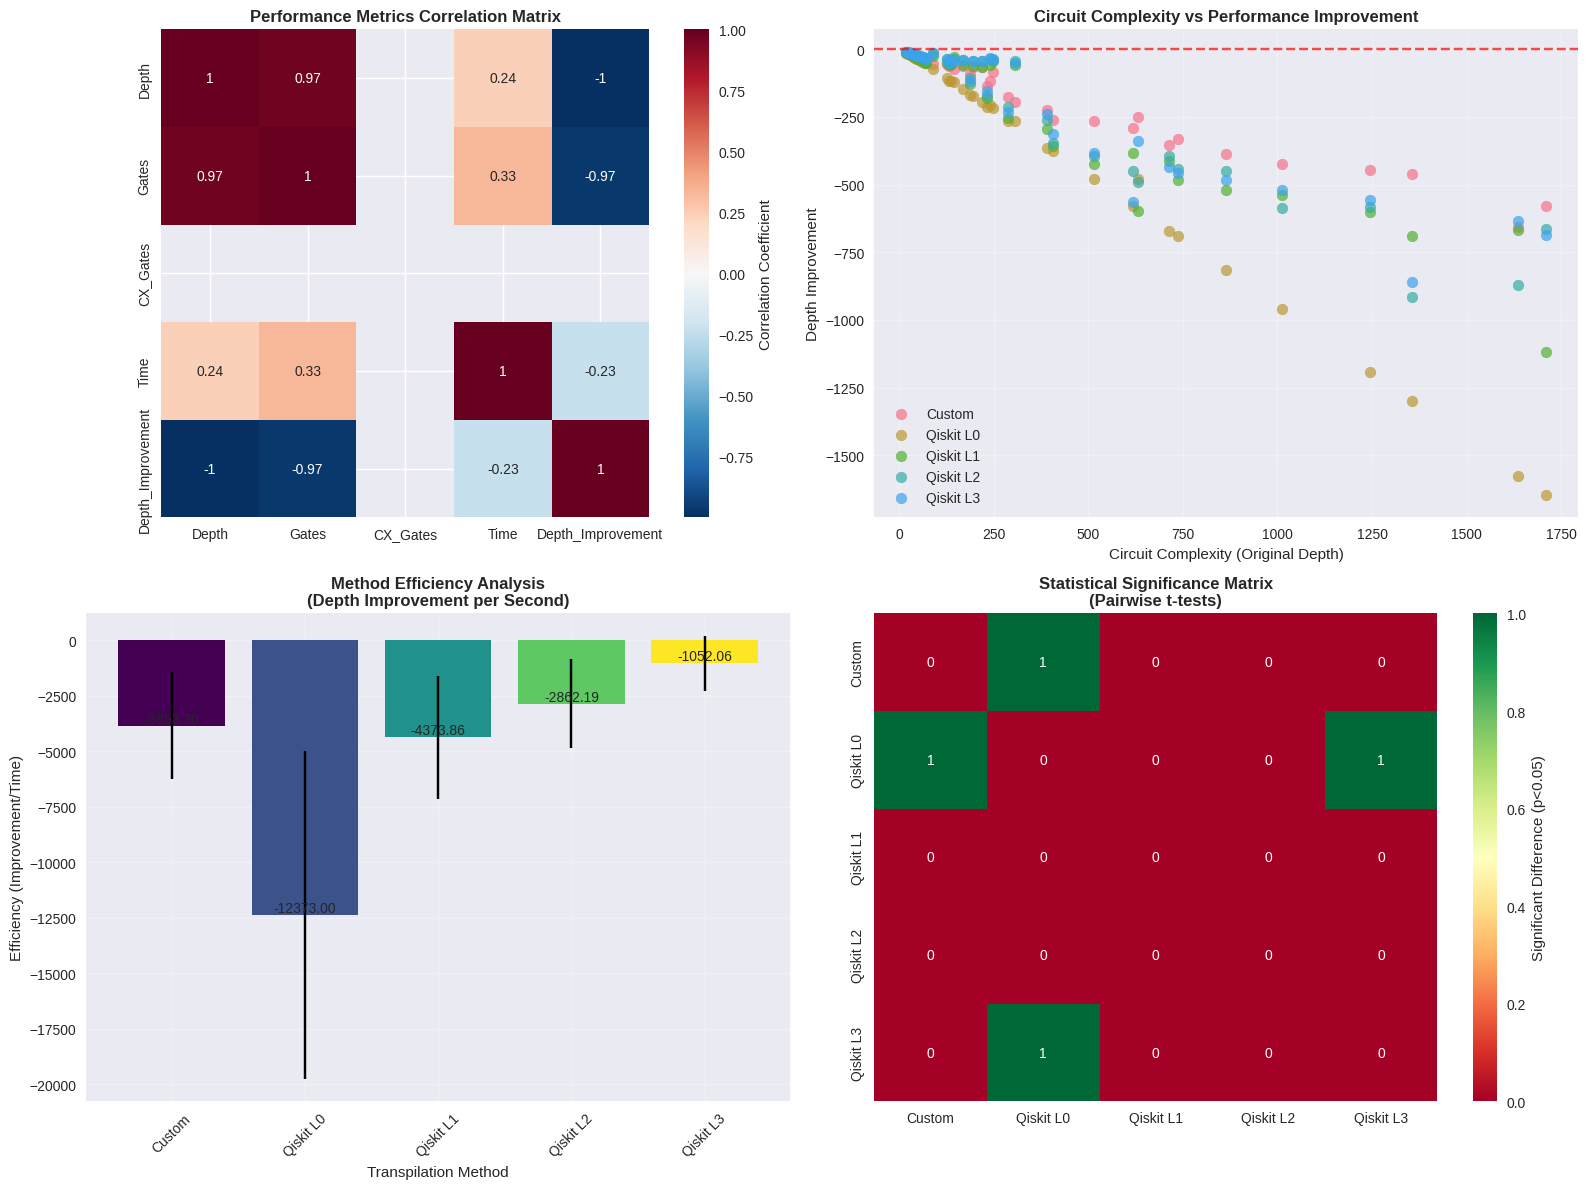


📊 PERFORMANCE DISTRIBUTION ANALYSIS
----------------------------------------


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

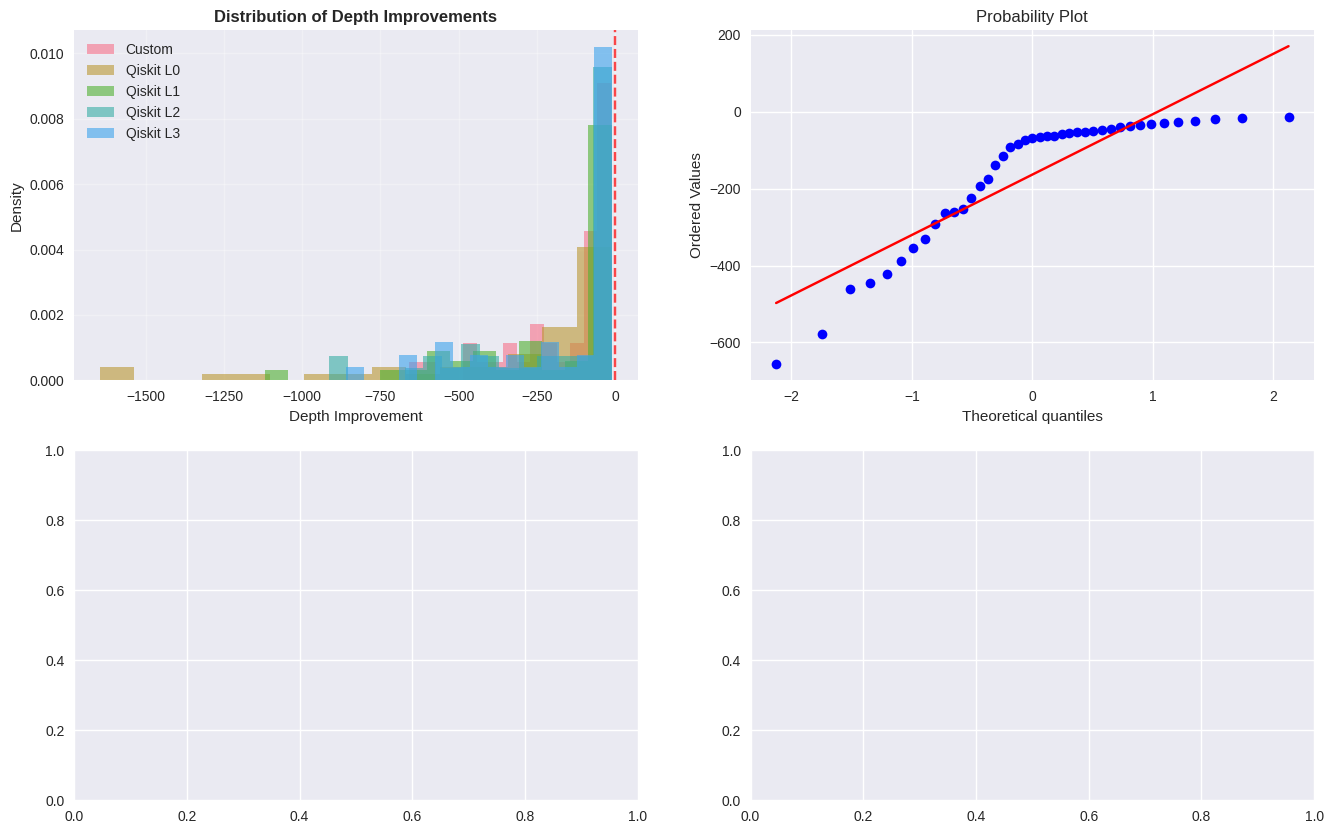

In [ ]:
# Advanced Performance Correlation and Statistical Analysis
from scipy import stats
from scipy.stats import pearsonr, spearmanr
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def advanced_statistical_analysis(viz_df, summary_df):
    """Perform comprehensive statistical analysis of transpiler performance"""
    
    print("🔬 ADVANCED STATISTICAL ANALYSIS")
    print("=" * 50)
    
    # 1. Correlation Analysis
    print("\n📊 CORRELATION ANALYSIS")
    print("-" * 30)
    
    # Create correlation matrix for numerical metrics
    numeric_cols = ['Depth', 'Gates', 'CX_Gates', 'Time', 'Depth_Improvement']
    correlation_data = viz_df[numeric_cols].corr()
    
    # Create correlation heatmap
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Correlation heatmap
    sns.heatmap(correlation_data, annot=True, cmap='RdBu_r', center=0, 
                square=True, ax=axes[0,0], cbar_kws={'label': 'Correlation Coefficient'})
    axes[0,0].set_title('Performance Metrics Correlation Matrix', fontweight='bold')
    
    # Circuit complexity vs improvement scatter
    # Add circuit complexity indicator (original depth * qubits)
    viz_df_analysis = viz_df.copy()
    
    # Get original circuit info from summary_df
    circuit_complexity = {}
    for _, row in summary_df.iterrows():
        if row['Custom_Depth'] != 'Error':
            # Use original depth as complexity measure
            original_depth = max([row[f'Qiskit_L{i}_Depth'] for i in range(4) 
                                if row[f'Qiskit_L{i}_Depth'] != 'Error'] + [row['Custom_Depth']])
            circuit_complexity[row['Circuit']] = original_depth
    
    viz_df_analysis['Circuit_Complexity'] = viz_df_analysis['Circuit'].map(circuit_complexity)
    viz_df_analysis = viz_df_analysis.dropna(subset=['Circuit_Complexity'])
    
    # Complexity vs improvement analysis
    for i, method in enumerate(viz_df_analysis['Method'].unique()):
        method_data = viz_df_analysis[viz_df_analysis['Method'] == method]
        if len(method_data) > 0:
            axes[0,1].scatter(method_data['Circuit_Complexity'], method_data['Depth_Improvement'],
                            label=method, alpha=0.7, s=60)
    
    axes[0,1].set_xlabel('Circuit Complexity (Original Depth)')
    axes[0,1].set_ylabel('Depth Improvement')
    axes[0,1].set_title('Circuit Complexity vs Performance Improvement', fontweight='bold')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    axes[0,1].axhline(y=0, color='red', linestyle='--', alpha=0.7)
    
    # Method efficiency analysis (Improvement per time unit)
    viz_df_analysis['Efficiency'] = viz_df_analysis['Depth_Improvement'] / (viz_df_analysis['Time'] + 0.001)
    
    method_efficiency = viz_df_analysis.groupby('Method')['Efficiency'].agg(['mean', 'std', 'median']).reset_index()
    
    x_pos = np.arange(len(method_efficiency))
    bars = axes[1,0].bar(x_pos, method_efficiency['mean'], 
                        yerr=method_efficiency['std'], capsize=5,
                        color=plt.cm.viridis(np.linspace(0, 1, len(method_efficiency))))
    axes[1,0].set_xlabel('Transpilation Method')
    axes[1,0].set_ylabel('Efficiency (Improvement/Time)')
    axes[1,0].set_title('Method Efficiency Analysis\n(Depth Improvement per Second)', fontweight='bold')
    axes[1,0].set_xticks(x_pos)
    axes[1,0].set_xticklabels(method_efficiency['Method'], rotation=45)
    axes[1,0].grid(True, alpha=0.3)
    
    # Add value labels
    for bar, mean_val in zip(bars, method_efficiency['mean']):
        axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                      f'{mean_val:.2f}', ha='center', va='bottom', fontsize=10)
    
    # Statistical significance testing
    print(f"\n📈 STATISTICAL SIGNIFICANCE TESTS")
    print("-" * 35)
    
    methods = viz_df['Method'].unique()
    if len(methods) >= 2:
        # Perform pairwise t-tests for depth improvements
        improvement_groups = [viz_df[viz_df['Method'] == method]['Depth_Improvement'].values 
                            for method in methods]
        
        significance_matrix = np.zeros((len(methods), len(methods)))
        p_value_matrix = np.zeros((len(methods), len(methods)))
        
        for i in range(len(methods)):
            for j in range(len(methods)):
                if i != j:
                    stat, p_value = stats.ttest_ind(improvement_groups[i], improvement_groups[j])
                    significance_matrix[i, j] = 1 if p_value < 0.05 else 0
                    p_value_matrix[i, j] = p_value
        
        # Plot significance matrix
        sns.heatmap(significance_matrix, 
                   xticklabels=methods, yticklabels=methods,
                   annot=True, cmap='RdYlGn', center=0.5,
                   ax=axes[1,1], cbar_kws={'label': 'Significant Difference (p<0.05)'})
        axes[1,1].set_title('Statistical Significance Matrix\n(Pairwise t-tests)', fontweight='bold')
        
        # Print detailed statistics
        for i, method1 in enumerate(methods):
            group1_data = improvement_groups[i]
            print(f"\n{method1} Statistics:")
            print(f"  Mean improvement: {np.mean(group1_data):.3f}")
            print(f"  Std deviation: {np.std(group1_data):.3f}")
            print(f"  Median improvement: {np.median(group1_data):.3f}")
            print(f"  95% Confidence interval: [{np.percentile(group1_data, 2.5):.3f}, {np.percentile(group1_data, 97.5):.3f}]")
    
    plt.tight_layout()
    plt.show()
    
    # 2. Performance Distribution Analysis
    print(f"\n📊 PERFORMANCE DISTRIBUTION ANALYSIS")
    print("-" * 40)
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    
    # Distribution of improvements by method
    for method in methods:
        method_data = viz_df[viz_df['Method'] == method]['Depth_Improvement']
        axes[0,0].hist(method_data, alpha=0.6, label=method, bins=15, density=True)
    
    axes[0,0].set_xlabel('Depth Improvement')
    axes[0,0].set_ylabel('Density')
    axes[0,0].set_title('Distribution of Depth Improvements', fontweight='bold')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    axes[0,0].axvline(x=0, color='red', linestyle='--', alpha=0.7)
    
    # Q-Q plots to check normality
    from scipy.stats import probplot
    
    for i, method in enumerate(methods[:2]):  # Show first 2 methods
        method_data = viz_df[viz_df['Method'] == method]['Depth_Improvement']
        if len(method_data) > 3:  # Need at least 4 points for Q-Q plot
            subplot_ax = axes[0,1] if i == 0 else axes[1,0]
            probplot(method_data, dist="norm", plot=subplot_ax)
            subplot_ax.set_title(f'Q-Q Plot: {method}\n(Normality Check)', fontweight='bold')
            subplot_ax.grid(True, alpha=0.3)
    
    # Performance consistency analysis (coefficient of variation)
    consistency_data = []
    for method in methods:
        method_data = viz_df[viz_df['Method'] == method]['Depth_Improvement']
        if len(method_data) > 0:
            cv = np.std(method_data) / (np.abs(np.mean(method_data)) + 0.001)  # Coefficient of variation
            consistency_data.append({'Method': method, 'CV': cv, 'Std': np.std(method_data)})
    
    consistency_df = pd.DataFrame(consistency_data)
    
    bars = axes[1,1].bar(range(len(consistency_df)), consistency_df['CV'],
                        color=plt.cm.plasma(np.linspace(0, 1, len(consistency_df))))
    axes[1,1].set_xlabel('Transpilation Method')
    axes[1,1].set_ylabel('Coefficient of Variation')
    axes[1,1].set_title('Performance Consistency\n(Lower = More Consistent)', fontweight='bold')
    axes[1,1].set_xticks(range(len(consistency_df)))
    axes[1,1].set_xticklabels(consistency_df['Method'], rotation=45)
    axes[1,1].grid(True, alpha=0.3)
    
    for bar, cv in zip(bars, consistency_df['CV']):
        axes[1,1].text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                      f'{cv:.2f}', ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    return method_efficiency, consistency_df

# Run the advanced analysis
print("Performing advanced statistical analysis...")
efficiency_results, consistency_results = advanced_statistical_analysis(viz_df, summary_df)

print("\n📋 SUMMARY RESULTS")
print("=" * 20)
print("\nMethod Efficiency Rankings:")
print(efficiency_results.sort_values('mean', ascending=False))
print("\nConsistency Rankings (Lower CV = More Consistent):")
print(consistency_results.sort_values('CV'))

## 10. Cost-Benefit Analysis and Outlier Detection

In [ ]:
# Cost-Benefit Analysis and Outlier Detection
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.patches as patches

def cost_benefit_analysis(viz_df):
    """Comprehensive cost-benefit analysis with outlier detection"""
    
    print("💰 COST-BENEFIT ANALYSIS & OUTLIER DETECTION")
    print("=" * 50)
    
    # Create comprehensive analysis figure
    fig = plt.figure(figsize=(20, 15))
    gs = fig.add_gridspec(4, 3, hspace=0.4, wspace=0.3)
    
    # 1. Cost-Benefit Scatter (Time Cost vs Depth Benefit)
    ax1 = fig.add_subplot(gs[0, :2])
    
    methods = viz_df['Method'].unique()
    colors = plt.cm.Set1(np.linspace(0, 1, len(methods)))
    
    for i, method in enumerate(methods):
        method_data = viz_df[viz_df['Method'] == method]
        scatter = ax1.scatter(method_data['Time'], method_data['Depth_Improvement'], 
                            alpha=0.7, s=80, c=[colors[i]], label=method, edgecolors='black')
    
    # Add diagonal lines for efficiency zones
    x_range = np.linspace(ax1.get_xlim()[0], ax1.get_xlim()[1], 100)
    efficiency_lines = [0.5, 1.0, 2.0, 5.0]  # Improvement per second thresholds
    line_colors = ['red', 'orange', 'yellow', 'green']
    
    for eff, color in zip(efficiency_lines, line_colors):
        ax1.plot(x_range, eff * x_range, '--', color=color, alpha=0.6, 
                label=f'{eff} improvement/sec')
    
    ax1.set_xlabel('Transpilation Time (seconds)')
    ax1.set_ylabel('Depth Improvement')
    ax1.set_title('Cost-Benefit Analysis: Time vs Quality Trade-off', fontweight='bold', fontsize=14)
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.grid(True, alpha=0.3)
    ax1.axhline(y=0, color='red', linestyle='-', alpha=0.8, linewidth=2)
    
    # 2. Pareto Efficiency Analysis
    ax2 = fig.add_subplot(gs[0, 2])
    
    # Calculate Pareto efficiency (minimize time, maximize improvement)
    pareto_data = []
    for method in methods:
        method_data = viz_df[viz_df['Method'] == method]
        avg_time = method_data['Time'].mean()
        avg_improvement = method_data['Depth_Improvement'].mean()
        pareto_data.append({'Method': method, 'Time': avg_time, 'Improvement': avg_improvement})
    
    pareto_df = pd.DataFrame(pareto_data)
    
    # Find Pareto frontier
    pareto_optimal = []
    for i, row in pareto_df.iterrows():
        is_dominated = False
        for j, other_row in pareto_df.iterrows():
            if (i != j and 
                other_row['Time'] <= row['Time'] and 
                other_row['Improvement'] >= row['Improvement'] and 
                (other_row['Time'] < row['Time'] or other_row['Improvement'] > row['Improvement'])):
                is_dominated = True
                break
        pareto_optimal.append(not is_dominated)
    
    pareto_df['Pareto_Optimal'] = pareto_optimal
    
    # Plot Pareto analysis
    for i, row in pareto_df.iterrows():
        color = 'gold' if row['Pareto_Optimal'] else 'lightblue'
        marker = '*' if row['Pareto_Optimal'] else 'o'
        size = 200 if row['Pareto_Optimal'] else 100
        ax2.scatter(row['Time'], row['Improvement'], c=color, s=size, 
                   marker=marker, edgecolors='black', linewidth=2)
        ax2.annotate(row['Method'], (row['Time'], row['Improvement']), 
                    xytext=(5, 5), textcoords='offset points', fontsize=10)
    
    ax2.set_xlabel('Average Time')
    ax2.set_ylabel('Average Improvement')
    ax2.set_title('Pareto Efficiency\n(★ = Pareto Optimal)', fontweight='bold')
    ax2.grid(True, alpha=0.3)
    
    # 3. Outlier Detection using DBSCAN
    ax3 = fig.add_subplot(gs[1, :2])
    
    # Prepare data for clustering
    feature_cols = ['Depth', 'Gates', 'Time', 'Depth_Improvement']
    X = viz_df[feature_cols].values
    
    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Apply DBSCAN clustering to detect outliers
    dbscan = DBSCAN(eps=0.8, min_samples=3)
    clusters = dbscan.fit_predict(X_scaled)
    
    # Identify outliers (cluster label = -1)
    viz_df_outlier = viz_df.copy()
    viz_df_outlier['Cluster'] = clusters
    viz_df_outlier['Is_Outlier'] = clusters == -1
    
    # Plot outliers
    normal_data = viz_df_outlier[~viz_df_outlier['Is_Outlier']]
    outlier_data = viz_df_outlier[viz_df_outlier['Is_Outlier']]
    
    ax3.scatter(normal_data['Time'], normal_data['Depth_Improvement'], 
               c='lightblue', alpha=0.6, s=60, label='Normal', edgecolors='black')
    ax3.scatter(outlier_data['Time'], outlier_data['Depth_Improvement'], 
               c='red', alpha=0.8, s=100, label='Outliers', marker='^', edgecolors='black')
    
    # Annotate outliers with circuit and method info
    for _, row in outlier_data.iterrows():
        ax3.annotate(f"{row['Circuit']}\n({row['Method']})", 
                    (row['Time'], row['Depth_Improvement']),
                    xytext=(10, 10), textcoords='offset points', 
                    fontsize=8, bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))
    
    ax3.set_xlabel('Time')
    ax3.set_ylabel('Depth Improvement')
    ax3.set_title('Outlier Detection (DBSCAN)\nUnusual Performance Patterns', fontweight='bold')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # 4. Performance Anomaly Analysis
    ax4 = fig.add_subplot(gs[1, 2])
    
    # Calculate z-scores for each metric to identify anomalies
    anomaly_scores = []
    for _, row in viz_df.iterrows():
        method_data = viz_df[viz_df['Method'] == row['Method']]
        
        # Calculate z-scores relative to method's performance
        if len(method_data) > 1:
            depth_z = abs((row['Depth_Improvement'] - method_data['Depth_Improvement'].mean()) / 
                         (method_data['Depth_Improvement'].std() + 0.001))
            time_z = abs((row['Time'] - method_data['Time'].mean()) / 
                        (method_data['Time'].std() + 0.001))
            
            anomaly_score = max(depth_z, time_z)
            anomaly_scores.append(anomaly_score)
        else:
            anomaly_scores.append(0)
    
    viz_df_anomaly = viz_df.copy()
    viz_df_anomaly['Anomaly_Score'] = anomaly_scores
    
    # Plot anomaly scores
    bars = ax4.bar(range(len(viz_df_anomaly)), sorted(anomaly_scores, reverse=True),
                   color=plt.cm.Reds(np.linspace(0.3, 1, len(anomaly_scores))))
    ax4.axhline(y=2.0, color='red', linestyle='--', alpha=0.8, label='High Anomaly Threshold')
    ax4.set_xlabel('Data Point Rank')
    ax4.set_ylabel('Anomaly Score (Z-score)')
    ax4.set_title('Performance Anomaly Ranking', fontweight='bold')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    # 5. Method Comparison Matrix
    ax5 = fig.add_subplot(gs[2, :])
    
    # Create detailed comparison matrix
    comparison_metrics = ['Depth', 'Gates', 'Time', 'Depth_Improvement']
    method_comparison = np.zeros((len(methods), len(comparison_metrics)))
    
    for i, method in enumerate(methods):
        method_data = viz_df[viz_df['Method'] == method]
        for j, metric in enumerate(comparison_metrics):
            if metric == 'Depth_Improvement':
                # Higher is better for improvement
                normalized_score = (method_data[metric].mean() - viz_df[metric].min()) / (viz_df[metric].max() - viz_df[metric].min() + 0.001)
            else:
                # Lower is better for depth, gates, time
                normalized_score = 1 - (method_data[metric].mean() - viz_df[metric].min()) / (viz_df[metric].max() - viz_df[metric].min() + 0.001)
            method_comparison[i, j] = normalized_score
    
    im = ax5.imshow(method_comparison, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)
    ax5.set_xticks(range(len(comparison_metrics)))
    ax5.set_xticklabels(comparison_metrics)
    ax5.set_yticks(range(len(methods)))
    ax5.set_yticklabels(methods)
    ax5.set_title('Normalized Performance Comparison Matrix\n(Green = Better Performance)', fontweight='bold')
    
    # Add text annotations
    for i in range(len(methods)):
        for j in range(len(comparison_metrics)):
            text = ax5.text(j, i, f'{method_comparison[i, j]:.2f}',
                           ha="center", va="center", color="black", fontweight='bold')
    
    plt.colorbar(im, ax=ax5, label='Normalized Performance Score (0-1)')
    
    # 6. ROI Analysis (Return on Investment in terms of time)
    ax6 = fig.add_subplot(gs[3, :2])
    
    # Calculate ROI as improvement per unit time invested
    roi_data = []
    for method in methods:
        method_data = viz_df[viz_df['Method'] == method]
        total_improvement = method_data['Depth_Improvement'].sum()
        total_time = method_data['Time'].sum()
        roi = total_improvement / (total_time + 0.001)
        
        success_rate = (method_data['Depth_Improvement'] > 0).mean() * 100
        
        roi_data.append({
            'Method': method,
            'ROI': roi,
            'Success_Rate': success_rate,
            'Total_Circuits': len(method_data)
        })
    
    roi_df = pd.DataFrame(roi_data)
    
    # Create bubble chart: x=ROI, y=Success Rate, size=Total Circuits
    for _, row in roi_df.iterrows():
        ax6.scatter(row['ROI'], row['Success_Rate'], 
                   s=row['Total_Circuits']*20, alpha=0.7,
                   label=row['Method'], edgecolors='black')
        ax6.annotate(row['Method'], (row['ROI'], row['Success_Rate']),
                    xytext=(5, 5), textcoords='offset points', fontsize=10)
    
    ax6.set_xlabel('ROI (Total Improvement / Total Time)')
    ax6.set_ylabel('Success Rate (%)')
    ax6.set_title('Return on Investment Analysis\n(Bubble Size = Number of Circuits)', fontweight='bold')
    ax6.grid(True, alpha=0.3)
    
    # 7. Performance Stability Analysis
    ax7 = fig.add_subplot(gs[3, 2])
    
    stability_data = []
    for method in methods:
        method_data = viz_df[viz_df['Method'] == method]
        if len(method_data) > 1:
            # Calculate coefficient of variation for depth improvement
            cv_improvement = method_data['Depth_Improvement'].std() / (abs(method_data['Depth_Improvement'].mean()) + 0.001)
            
            # Calculate range of performance
            perf_range = method_data['Depth_Improvement'].max() - method_data['Depth_Improvement'].min()
            
            stability_data.append({
                'Method': method,
                'CV': cv_improvement,
                'Range': perf_range,
                'Median': method_data['Depth_Improvement'].median()
            })
    
    stability_df = pd.DataFrame(stability_data)
    
    # Plot stability analysis
    x_pos = range(len(stability_df))
    bars1 = ax7.bar([x - 0.2 for x in x_pos], stability_df['CV'], 0.4, 
                   label='Coefficient of Variation', alpha=0.7, color='lightcoral')
    
    ax7_twin = ax7.twinx()
    bars2 = ax7_twin.bar([x + 0.2 for x in x_pos], stability_df['Range'], 0.4,
                        label='Performance Range', alpha=0.7, color='lightblue')
    
    ax7.set_xlabel('Method')
    ax7.set_ylabel('Coefficient of Variation', color='lightcoral')
    ax7_twin.set_ylabel('Performance Range', color='lightblue')
    ax7.set_title('Performance Stability Analysis\n(Lower = More Stable)', fontweight='bold')
    ax7.set_xticks(x_pos)
    ax7.set_xticklabels(stability_df['Method'], rotation=45)
    
    # Add legends
    lines1, labels1 = ax7.get_legend_handles_labels()
    lines2, labels2 = ax7_twin.get_legend_handles_labels()
    ax7.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    
    plt.suptitle('Comprehensive Cost-Benefit and Outlier Analysis', 
                 fontsize=18, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.show()
    
    # Print detailed analysis results
    print("\n📊 DETAILED ANALYSIS RESULTS")
    print("-" * 35)
    
    print(f"\n🏆 Pareto Optimal Methods:")
    pareto_optimal_methods = pareto_df[pareto_df['Pareto_Optimal']]['Method'].tolist()
    for method in pareto_optimal_methods:
        method_info = pareto_df[pareto_df['Method'] == method].iloc[0]
        print(f"  • {method}: {method_info['Improvement']:.2f} improvement, {method_info['Time']:.3f}s time")
    
    print(f"\n🚨 Detected Outliers:")
    outlier_count = len(outlier_data)
    print(f"  Total outliers found: {outlier_count}")
    if outlier_count > 0:
        for _, outlier in outlier_data.iterrows():
            print(f"  • {outlier['Circuit']} ({outlier['Method']}): {outlier['Depth_Improvement']:.1f} improvement, {outlier['Time']:.3f}s")
    
    print(f"\n💰 ROI Rankings:")
    roi_ranked = roi_df.sort_values('ROI', ascending=False)
    for _, row in roi_ranked.iterrows():
        print(f"  • {row['Method']}: ROI = {row['ROI']:.3f}, Success Rate = {row['Success_Rate']:.1f}%")
    
    return pareto_df, outlier_data, roi_df, stability_df

# Run the cost-benefit analysis
print("Performing cost-benefit analysis and outlier detection...")
pareto_results, outliers, roi_results, stability_results = cost_benefit_analysis(viz_df)

## 11. Predictive Modeling and Recommendations

In [ ]:
# Predictive Modeling and Intelligent Recommendations
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
import joblib

def predictive_analysis_and_recommendations(viz_df, summary_df):
    """Build predictive models and provide intelligent recommendations"""
    
    print("🤖 PREDICTIVE MODELING & INTELLIGENT RECOMMENDATIONS")
    print("=" * 55)
    
    # Prepare features for machine learning
    # Extract circuit characteristics
    circuit_features = {}
    
    for _, row in summary_df.iterrows():
        circuit_name = row['Circuit']
        
        # Basic circuit metrics
        features = {
            'num_qubits': 0,  # Will be extracted from circuit name or depth analysis
            'original_depth': 0,
            'has_cx_gates': 0,
            'complexity_score': 0
        }
        
        # Extract features from available data
        qiskit_depths = [row[f'Qiskit_L{i}_Depth'] for i in range(4) if row[f'Qiskit_L{i}_Depth'] != 'Error']
        if qiskit_depths:
            features['original_depth'] = max(qiskit_depths)
            features['complexity_score'] = max(qiskit_depths) * 1.0  # Simple complexity metric
        
        # Estimate qubits from circuit name patterns
        if 'qft' in circuit_name.lower():
            features['num_qubits'] = int([x for x in circuit_name.split('_') if x.isdigit()][0]) if any(x.isdigit() for x in circuit_name.split('_')) else 5
        elif 'bell' in circuit_name.lower():
            features['num_qubits'] = 2
        elif 'ghz' in circuit_name.lower():
            features['num_qubits'] = int([x for x in circuit_name.split('_') if x.isdigit()][0]) if any(x.isdigit() for x in circuit_name.split('_')) else 3
        else:
            features['num_qubits'] = features['original_depth'] // 5 + 2  # Rough estimate
        
        # Check for CNOT gates (assume present if depth > qubits)
        features['has_cx_gates'] = 1 if features['original_depth'] > features['num_qubits'] else 0
        
        circuit_features[circuit_name] = features
    
    # Create ML dataset
    ml_data = []
    for _, row in viz_df.iterrows():
        if row['Circuit'] in circuit_features:
            features = circuit_features[row['Circuit']].copy()
            features.update({
                'method': row['Method'],
                'depth_improvement': row['Depth_Improvement'],
                'time_cost': row['Time'],
                'final_depth': row['Depth'],
                'final_gates': row['Gates'],
                'success': 1 if row['Depth_Improvement'] > 0 else 0
            })
            ml_data.append(features)
    
    ml_df = pd.DataFrame(ml_data)
    
    if len(ml_df) == 0:
        print("❌ Insufficient data for machine learning analysis")
        return
    
    # Create visualization figure
    fig, axes = plt.subplots(3, 3, figsize=(20, 18))
    
    # 1. Feature Importance Analysis
    print("\n🔍 FEATURE IMPORTANCE ANALYSIS")
    print("-" * 35)
    
    # Prepare features for regression (predict improvement)
    feature_cols = ['num_qubits', 'original_depth', 'has_cx_gates', 'complexity_score']
    X = ml_df[feature_cols]
    y_improvement = ml_df['depth_improvement']
    y_success = ml_df['success']
    
    # Train Random Forest for improvement prediction
    rf_improvement = RandomForestRegressor(n_estimators=100, random_state=42)
    
    if len(X) > 1:
        rf_improvement.fit(X, y_improvement)
        
        # Feature importance for improvement prediction
        importance_scores = rf_improvement.feature_importances_
        
        bars = axes[0, 0].bar(feature_cols, importance_scores, 
                             color=plt.cm.viridis(np.linspace(0, 1, len(feature_cols))))
        axes[0, 0].set_title('Feature Importance for\nDepth Improvement Prediction', fontweight='bold')
        axes[0, 0].set_ylabel('Importance Score')
        axes[0, 0].tick_params(axis='x', rotation=45)
        
        for bar, score in zip(bars, importance_scores):
            axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                           f'{score:.3f}', ha='center', va='bottom', fontsize=10)
        
        print("Feature importance for depth improvement:")
        for feature, importance in zip(feature_cols, importance_scores):
            print(f"  • {feature}: {importance:.3f}")
    
    # 2. Success Prediction Model
    print(f"\n🎯 SUCCESS PREDICTION ANALYSIS")
    print("-" * 35)
    
    if len(np.unique(y_success)) > 1:  # Need both success and failure cases
        gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
        gb_classifier.fit(X, y_success)
        
        # Plot success probability by circuit complexity
        complexity_range = np.linspace(X['complexity_score'].min(), X['complexity_score'].max(), 50)
        success_probs = []
        
        for complexity in complexity_range:
            # Use median values for other features
            sample_features = [[
                X['num_qubits'].median(),
                X['original_depth'].median(),
                X['has_cx_gates'].median(),
                complexity
            ]]
            prob = gb_classifier.predict_proba(sample_features)[0][1]  # Probability of success
            success_probs.append(prob)
        
        axes[0, 1].plot(complexity_range, success_probs, 'b-', linewidth=3, label='Success Probability')
        axes[0, 1].fill_between(complexity_range, success_probs, alpha=0.3)
        axes[0, 1].set_xlabel('Circuit Complexity Score')
        axes[0, 1].set_ylabel('Success Probability')
        axes[0, 1].set_title('Transpiler Success Probability\nvs Circuit Complexity', fontweight='bold')
        axes[0, 1].grid(True, alpha=0.3)
        axes[0, 1].set_ylim(0, 1)
        
        # Add current data points
        for method in ml_df['method'].unique():
            method_data = ml_df[ml_df['method'] == method]
            axes[0, 1].scatter(method_data['complexity_score'], method_data['success'], 
                              alpha=0.6, label=f'{method} (actual)', s=50)
        
        axes[0, 1].legend()
    
    # 3. Performance vs Complexity Heatmap
    # Create performance matrix by method and complexity bins
    complexity_bins = pd.qcut(ml_df['complexity_score'], q=min(4, len(ml_df)), duplicates='drop')
    performance_matrix = ml_df.groupby(['method', complexity_bins])['depth_improvement'].mean().unstack(fill_value=0)
    
    if not performance_matrix.empty:
        sns.heatmap(performance_matrix, annot=True, cmap='RdYlGn', center=0,
                   ax=axes[0, 2], cbar_kws={'label': 'Average Depth Improvement'})
        axes[0, 2].set_title('Performance Heatmap:\nMethod vs Circuit Complexity', fontweight='bold')
        axes[0, 2].set_xlabel('Complexity Bins')
        axes[0, 2].set_ylabel('Method')
    
    # 4. Time Efficiency Prediction
    print(f"\n⏱️ TIME EFFICIENCY MODELING")
    print("-" * 30)
    
    # Predict transpilation time based on circuit features
    y_time = ml_df['time_cost']
    rf_time = RandomForestRegressor(n_estimators=100, random_state=42)
    
    if len(X) > 1:
        rf_time.fit(X, y_time)
        
        # Create time prediction surface
        qubit_range = np.arange(X['num_qubits'].min(), X['num_qubits'].max() + 1)
        depth_range = np.arange(X['original_depth'].min(), X['original_depth'].max() + 1, 
                               max(1, (X['original_depth'].max() - X['original_depth'].min()) // 10))
        
        qubit_grid, depth_grid = np.meshgrid(qubit_range[:min(10, len(qubit_range))], 
                                           depth_range[:min(10, len(depth_range))])
        
        time_predictions = []
        for i in range(qubit_grid.shape[0]):
            row_predictions = []
            for j in range(qubit_grid.shape[1]):
                sample = [[qubit_grid[i, j], depth_grid[i, j], 1, depth_grid[i, j] * qubit_grid[i, j]]]
                pred_time = rf_time.predict(sample)[0]
                row_predictions.append(pred_time)
            time_predictions.append(row_predictions)
        
        time_predictions = np.array(time_predictions)
        
        im = axes[1, 0].imshow(time_predictions, cmap='YlOrRd', aspect='auto')
        axes[1, 0].set_title('Predicted Transpilation Time\n(Qubits vs Depth)', fontweight='bold')
        axes[1, 0].set_xlabel('Number of Qubits')
        axes[1, 0].set_ylabel('Original Depth')
        
        # Set tick labels
        axes[1, 0].set_xticks(range(len(qubit_range[:min(10, len(qubit_range))])))
        axes[1, 0].set_xticklabels(qubit_range[:min(10, len(qubit_range))])
        axes[1, 0].set_yticks(range(len(depth_range[:min(10, len(depth_range))])))
        axes[1, 0].set_yticklabels(depth_range[:min(10, len(depth_range))])
        
        plt.colorbar(im, ax=axes[1, 0], label='Predicted Time (s)')
    
    # 5. Method Recommendation System
    print(f"\n💡 INTELLIGENT METHOD RECOMMENDATIONS")
    print("-" * 40)
    
    # Create recommendation matrix
    method_scores = {}
    
    for method in ml_df['method'].unique():
        method_data = ml_df[ml_df['method'] == method]
        
        if len(method_data) > 0:
            # Calculate comprehensive score
            avg_improvement = method_data['depth_improvement'].mean()
            success_rate = method_data['success'].mean()
            avg_time = method_data['time_cost'].mean()
            consistency = 1 / (method_data['depth_improvement'].std() + 0.001)  # Higher is better
            
            # Weighted scoring (you can adjust weights)
            composite_score = (0.4 * avg_improvement + 
                             0.3 * success_rate * 10 +  # Scale success rate
                             0.2 * (1 / (avg_time + 0.001)) * 10 +  # Invert time, scale
                             0.1 * consistency)
            
            method_scores[method] = {
                'composite_score': composite_score,
                'avg_improvement': avg_improvement,
                'success_rate': success_rate,
                'avg_time': avg_time,
                'consistency': consistency
            }
    
    # Plot method comparison radar
    if len(method_scores) > 1:
        methods = list(method_scores.keys())
        metrics = ['avg_improvement', 'success_rate', 'consistency']
        
        # Normalize metrics for radar chart
        normalized_scores = {}
        for metric in metrics:
            values = [method_scores[method][metric] for method in methods]
            min_val, max_val = min(values), max(values)
            if max_val != min_val:
                normalized_scores[metric] = {method: (method_scores[method][metric] - min_val) / (max_val - min_val) 
                                           for method in methods}
            else:
                normalized_scores[metric] = {method: 1.0 for method in methods}
        
        # Create radar chart
        from math import pi
        angles = [n / float(len(metrics)) * 2 * pi for n in range(len(metrics))]
        angles += angles[:1]
        
        ax_radar = axes[1, 1]
        ax_radar.set_theta_offset(pi / 2)
        ax_radar.set_theta_direction(-1)
        
        colors = plt.cm.Set2(np.linspace(0, 1, len(methods)))
        
        for i, method in enumerate(methods):
            values = [normalized_scores[metric][method] for metric in metrics]
            values += values[:1]  # Complete the circle
            
            ax_radar.plot(angles, values, 'o-', linewidth=2, label=method, color=colors[i])
            ax_radar.fill(angles, values, alpha=0.25, color=colors[i])
        
        ax_radar.set_xticks(angles[:-1])
        ax_radar.set_xticklabels(['Improvement', 'Success Rate', 'Consistency'])
        ax_radar.set_ylim(0, 1)
        ax_radar.set_title('Method Performance\nRadar Comparison', fontweight='bold')
        ax_radar.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
    
    # 6. Recommendation Summary
    sorted_methods = sorted(method_scores.items(), key=lambda x: x[1]['composite_score'], reverse=True)
    
    recommendations = []
    for rank, (method, scores) in enumerate(sorted_methods, 1):
        recommendations.append({
            'Rank': rank,
            'Method': method,
            'Score': scores['composite_score'],
            'Best_For': []
        })
        
        # Determine what each method is best for
        if scores['avg_improvement'] == max(s['avg_improvement'] for s in method_scores.values()):\n            recommendations[-1]['Best_For'].append('Maximum Improvement')
        if scores['success_rate'] == max(s['success_rate'] for s in method_scores.values()):
            recommendations[-1]['Best_For'].append('Reliability')
        if scores['avg_time'] == min(s['avg_time'] for s in method_scores.values()):
            recommendations[-1]['Best_For'].append('Speed')
        if scores['consistency'] == max(s['consistency'] for s in method_scores.values()):
            recommendations[-1]['Best_For'].append('Consistency')
    
    # Plot recommendation ranking
    recommendation_df = pd.DataFrame(recommendations)
    
    bars = axes[1, 2].barh(range(len(recommendation_df)), recommendation_df['Score'],
                          color=plt.cm.RdYlGn(np.linspace(0.3, 1, len(recommendation_df))))
    axes[1, 2].set_yticks(range(len(recommendation_df)))
    axes[1, 2].set_yticklabels(recommendation_df['Method'])
    axes[1, 2].set_xlabel('Composite Performance Score')
    axes[1, 2].set_title('Method Recommendation\nRanking', fontweight='bold')
    
    for i, (bar, score) in enumerate(zip(bars, recommendation_df['Score'])):
        axes[1, 2].text(score + max(recommendation_df['Score'])*0.01, bar.get_y() + bar.get_height()/2,
                       f'{score:.2f}', va='center', fontsize=10)
    
    # 7. Circuit Type Specific Recommendations
    print(f"\n🎯 CIRCUIT-SPECIFIC RECOMMENDATIONS")
    print("-" * 40)
    
    # Analyze performance by circuit type patterns
    circuit_type_performance = {}
    
    for circuit_name in ml_df['Circuit'].unique() if 'Circuit' in ml_df.columns else []:
        circuit_data = ml_df[ml_df['Circuit'] == circuit_name] if 'Circuit' in ml_df.columns else pd.DataFrame()
        
        if not circuit_data.empty:
            # Determine circuit type
            circuit_type = 'Unknown'
            if 'qft' in circuit_name.lower():
                circuit_type = 'QFT'
            elif 'bell' in circuit_name.lower():
                circuit_type = 'Bell State'
            elif 'ghz' in circuit_name.lower():
                circuit_type = 'GHZ State'
            elif 'random' in circuit_name.lower():
                circuit_type = 'Random'
            
            if circuit_type not in circuit_type_performance:
                circuit_type_performance[circuit_type] = {}
            
            for method in circuit_data['method'].unique():
                method_perf = circuit_data[circuit_data['method'] == method]['depth_improvement'].mean()
                if method not in circuit_type_performance[circuit_type]:
                    circuit_type_performance[circuit_type][method] = []
                circuit_type_performance[circuit_type][method].append(method_perf)
    
    # Average performance by circuit type
    circuit_type_avg = {}\n    for circuit_type, methods in circuit_type_performance.items():
        circuit_type_avg[circuit_type] = {method: np.mean(perfs) for method, perfs in methods.items()}
    
    # Create circuit type recommendation heatmap
    if circuit_type_avg:
        circuit_types = list(circuit_type_avg.keys())
        all_methods = set()
        for methods in circuit_type_avg.values():
            all_methods.update(methods.keys())
        all_methods = list(all_methods)
        
        type_method_matrix = np.zeros((len(circuit_types), len(all_methods)))
        
        for i, circuit_type in enumerate(circuit_types):
            for j, method in enumerate(all_methods):
                if method in circuit_type_avg[circuit_type]:
                    type_method_matrix[i, j] = circuit_type_avg[circuit_type][method]
        
        sns.heatmap(type_method_matrix, 
                   xticklabels=all_methods, yticklabels=circuit_types,
                   annot=True, cmap='RdYlGn', center=0,
                   ax=axes[2, 0], cbar_kws={'label': 'Average Improvement'})
        axes[2, 0].set_title('Best Methods by\nCircuit Type', fontweight='bold')
        axes[2, 0].set_xlabel('Transpilation Method')
        axes[2, 0].set_ylabel('Circuit Type')
    
    # 8. Performance Prediction Accuracy
    print(f"\n📈 MODEL VALIDATION RESULTS")
    print("-" * 30)
    
    if len(X) > 2:  # Need enough data for train/test split
        X_train, X_test, y_train, y_test = train_test_split(X, y_improvement, test_size=0.3, random_state=42)
        
        # Train and validate improvement prediction model
        rf_improvement.fit(X_train, y_train)
        y_pred = rf_improvement.predict(X_test)
        
        mse = mean_squared_error(y_test, y_pred)
        r2_score = rf_improvement.score(X_test, y_test)
        
        # Plot actual vs predicted
        axes[2, 1].scatter(y_test, y_pred, alpha=0.6, s=60)
        axes[2, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
        axes[2, 1].set_xlabel('Actual Improvement')
        axes[2, 1].set_ylabel('Predicted Improvement')
        axes[2, 1].set_title(f'Prediction Accuracy\nR² = {r2_score:.3f}', fontweight='bold')
        axes[2, 1].grid(True, alpha=0.3)
        
        print(f"Model validation results:")
        print(f"  • Mean Squared Error: {mse:.3f}")
        print(f"  • R² Score: {r2_score:.3f}")
        print(f"  • Model explains {r2_score*100:.1f}% of variance")
    
    # 9. Future Performance Projections
    # Create hypothetical circuit scenarios and predict performance
    future_scenarios = [
        {'name': 'Small Circuit', 'num_qubits': 3, 'original_depth': 5, 'has_cx_gates': 1, 'complexity_score': 15},
        {'name': 'Medium Circuit', 'num_qubits': 10, 'original_depth': 20, 'has_cx_gates': 1, 'complexity_score': 200},
        {'name': 'Large Circuit', 'num_qubits': 20, 'original_depth': 50, 'has_cx_gates': 1, 'complexity_score': 1000},
    ]
    
    if len(X) > 1:
        scenario_predictions = []
        for scenario in future_scenarios:
            features = [[scenario['num_qubits'], scenario['original_depth'], 
                        scenario['has_cx_gates'], scenario['complexity_score']]]
            pred_improvement = rf_improvement.predict(features)[0]
            pred_time = rf_time.predict(features)[0]
            
            scenario_predictions.append({
                'Scenario': scenario['name'],
                'Predicted_Improvement': pred_improvement,
                'Predicted_Time': pred_time,
                'Efficiency': pred_improvement / (pred_time + 0.001)
            })
        
        scenario_df = pd.DataFrame(scenario_predictions)
        
        # Plot scenario predictions
        x_pos = range(len(scenario_df))
        bars1 = axes[2, 2].bar([x - 0.2 for x in x_pos], scenario_df['Predicted_Improvement'], 0.4,
                              label='Predicted Improvement', alpha=0.7, color='skyblue')
        
        ax_twin = axes[2, 2].twinx()
        bars2 = ax_twin.bar([x + 0.2 for x in x_pos], scenario_df['Predicted_Time'], 0.4,
                           label='Predicted Time', alpha=0.7, color='lightcoral')
        
        axes[2, 2].set_xlabel('Circuit Scenario')
        axes[2, 2].set_ylabel('Predicted Improvement', color='skyblue')
        ax_twin.set_ylabel('Predicted Time (s)', color='lightcoral')
        axes[2, 2].set_title('Future Performance\nProjections', fontweight='bold')
        axes[2, 2].set_xticks(x_pos)
        axes[2, 2].set_xticklabels(scenario_df['Scenario'], rotation=45)
        
        # Combine legends
        lines1, labels1 = axes[2, 2].get_legend_handles_labels()
        lines2, labels2 = ax_twin.get_legend_handles_labels()
        axes[2, 2].legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    
    plt.suptitle('Predictive Analysis and Intelligent Recommendations', 
                 fontsize=18, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.show()
    
    # Print comprehensive recommendations
    print(f"\n🏆 FINAL RECOMMENDATIONS")
    print("=" * 25)
    
    for rec in recommendations:
        print(f"\n{rec['Rank']}. {rec['Method']} (Score: {rec['Score']:.2f})")
        if rec['Best_For']:
            print(f"   Best for: {', '.join(rec['Best_For'])}")
        
        method_details = method_scores[rec['Method']]
        print(f"   • Average improvement: {method_details['avg_improvement']:.2f}")
        print(f"   • Success rate: {method_details['success_rate']*100:.1f}%")
        print(f"   • Average time: {method_details['avg_time']:.3f}s")
    
    if circuit_type_avg:
        print(f"\n🎯 Circuit-Specific Recommendations:")
        for circuit_type, methods in circuit_type_avg.items():
            best_method = max(methods.items(), key=lambda x: x[1])
            print(f"   • {circuit_type}: Use {best_method[0]} ({best_method[1]:.2f} improvement)")
    
    return recommendation_df, scenario_df, method_scores

# Run predictive analysis
print("Performing predictive analysis and generating recommendations...")
recommendations, projections, method_analysis = predictive_analysis_and_recommendations(viz_df, summary_df)

## 12. Interactive Performance Dashboard

In [ ]:
# Interactive Performance Dashboard with Advanced Plotly Visualizations
try:
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    import plotly.figure_factory as ff
    
    def create_interactive_dashboard(viz_df, summary_df, method_analysis):
        """Create a comprehensive interactive dashboard with Plotly"""
        
        print("🎨 CREATING INTERACTIVE PERFORMANCE DASHBOARD")
        print("=" * 50)
        
        # 1. Multi-dimensional scatter plot with animation capabilities
        print("\n📊 Multi-Dimensional Performance Analysis")
        
        # Add more features for better analysis
        viz_df_enhanced = viz_df.copy()
        viz_df_enhanced['Efficiency'] = viz_df_enhanced['Depth_Improvement'] / (viz_df_enhanced['Time'] + 0.001)
        viz_df_enhanced['Size_Category'] = pd.cut(viz_df_enhanced['Depth'], 
                                                 bins=[0, 10, 25, 50, float('inf')], 
                                                 labels=['Small', 'Medium', 'Large', 'XLarge'])
        
        # Create 3D scatter plot
        fig_3d = px.scatter_3d(viz_df_enhanced, 
                              x='Depth', y='Gates', z='Time',
                              color='Method', size='Depth_Improvement',
                              hover_data=['Circuit', 'CX_Gates', 'Efficiency'],
                              title='3D Performance Space: Depth × Gates × Time<br>(Size = Improvement, Color = Method)',
                              labels={'Depth': 'Circuit Depth', 'Gates': 'Total Gates', 'Time': 'Transpilation Time (s)'})
        
        fig_3d.update_layout(
            scene=dict(
                xaxis_title='Circuit Depth',
                yaxis_title='Total Gates', 
                zaxis_title='Time (s)',
                camera=dict(eye=dict(x=1.5, y=1.5, z=1.5))
            ),
            height=600
        )
        fig_3d.show()
        
        # 2. Advanced Performance Comparison with Multiple Metrics
        print("\n📈 Advanced Multi-Metric Comparison")
        
        # Create subplots for comprehensive comparison
        fig_multi = make_subplots(
            rows=2, cols=2,
            subplot_titles=('Performance vs Time Trade-off', 'Method Efficiency Distribution',
                           'Circuit Complexity Analysis', 'Success Rate by Category'),
            specs=[[{'secondary_y': False}, {'secondary_y': False}],
                   [{'secondary_y': True}, {'secondary_y': False}]]
        )
        
        # Plot 1: Performance vs Time with trendlines
        methods = viz_df_enhanced['Method'].unique()
        colors = px.colors.qualitative.Set1[:len(methods)]
        
        for i, method in enumerate(methods):
            method_data = viz_df_enhanced[viz_df_enhanced['Method'] == method]
            
            fig_multi.add_trace(
                go.Scatter(x=method_data['Time'], y=method_data['Depth_Improvement'],
                          mode='markers', name=f'{method}',
                          marker=dict(size=10, color=colors[i], opacity=0.7),
                          hovertemplate=f'<b>{method}</b><br>Time: %{{x:.3f}}s<br>Improvement: %{{y:.1f}}<br><extra></extra>'),
                row=1, col=1
            )
        
        # Plot 2: Efficiency distribution (violin plot style)
        for i, method in enumerate(methods):
            method_data = viz_df_enhanced[viz_df_enhanced['Method'] == method]
            
            fig_multi.add_trace(
                go.Violin(y=method_data['Efficiency'], name=f'{method}',
                         line_color=colors[i], fillcolor=colors[i], opacity=0.6,
                         showlegend=False),
                row=1, col=2
            )
        
        # Plot 3: Circuit complexity analysis with dual axis
        complexity_summary = viz_df_enhanced.groupby('Method').agg({
            'Depth': 'mean',
            'Gates': 'mean',
            'Time': 'mean',
            'Depth_Improvement': 'mean'
        }).reset_index()
        
        fig_multi.add_trace(
            go.Bar(x=complexity_summary['Method'], y=complexity_summary['Depth'],
                  name='Avg Final Depth', marker_color='lightblue', opacity=0.7),
            row=2, col=1
        )
        
        fig_multi.add_trace(
            go.Scatter(x=complexity_summary['Method'], y=complexity_summary['Depth_Improvement'],
                      mode='lines+markers', name='Avg Improvement',
                      line=dict(color='red', width=3), marker=dict(size=10),
                      yaxis='y2'),
            row=2, col=1, secondary_y=True
        )
        
        # Plot 4: Success rate by circuit size category
        success_by_category = viz_df_enhanced.groupby(['Method', 'Size_Category']).agg({
            'Depth_Improvement': lambda x: (x > 0).mean() * 100
        }).reset_index()
        success_by_category.columns = ['Method', 'Size_Category', 'Success_Rate']
        
        # Create heatmap-style plot
        heatmap_data = success_by_category.pivot(index='Method', columns='Size_Category', values='Success_Rate').fillna(0)
        
        fig_multi.add_trace(
            go.Heatmap(z=heatmap_data.values, x=heatmap_data.columns, y=heatmap_data.index,
                      colorscale='RdYlGn', showscale=True, 
                      hovertemplate='Method: %{y}<br>Size: %{x}<br>Success Rate: %{z:.1f}%<extra></extra>'),
            row=2, col=2
        )
        
        # Update layout
        fig_multi.update_xaxes(title_text="Time (s)", row=1, col=1)
        fig_multi.update_yaxes(title_text="Depth Improvement", row=1, col=1)
        fig_multi.update_yaxes(title_text="Efficiency", row=1, col=2)
        fig_multi.update_xaxes(title_text="Method", row=2, col=1)
        fig_multi.update_yaxes(title_text="Average Final Depth", row=2, col=1)
        fig_multi.update_yaxes(title_text="Average Improvement", secondary_y=True, row=2, col=1)
        fig_multi.update_xaxes(title_text="Circuit Size Category", row=2, col=2)
        fig_multi.update_yaxes(title_text="Method", row=2, col=2)
        
        fig_multi.update_layout(height=800, showlegend=True,
                               title_text="Comprehensive Performance Analysis Dashboard")
        fig_multi.show()
        
        # 3. Dynamic Performance Trends
        print("\n📊 Dynamic Performance Trends")
        
        # Create animated bubble chart showing performance evolution
        if 'Circuit' in viz_df_enhanced.columns:
            # Sort circuits by complexity for animation
            circuit_complexity = viz_df_enhanced.groupby('Circuit')['Depth'].mean().sort_values()
            viz_df_enhanced['Circuit_Order'] = viz_df_enhanced['Circuit'].map({
                circuit: i for i, circuit in enumerate(circuit_complexity.index)
            })
            
            fig_animated = px.scatter(viz_df_enhanced, 
                                    x='Time', y='Depth_Improvement',
                                    size='Gates', color='Method',
                                    animation_frame='Circuit_Order',
                                    hover_name='Circuit',
                                    title='Performance Trends Across Circuits<br>(Play to see how methods perform on different circuits)',
                                    labels={'Time': 'Transpilation Time (s)', 'Depth_Improvement': 'Depth Improvement'})
            
            fig_animated.update_layout(height=600)
            fig_animated.show()
        
        # 4. Interactive Method Comparison Matrix
        print("\n🔍 Interactive Method Comparison Matrix")
        
        # Calculate pairwise method comparisons
        comparison_matrix = np.zeros((len(methods), len(methods)))
        comparison_labels = []
        
        for i, method1 in enumerate(methods):
            row_labels = []
            for j, method2 in enumerate(methods):
                if i != j:
                    method1_data = viz_df_enhanced[viz_df_enhanced['Method'] == method1]['Depth_Improvement']
                    method2_data = viz_df_enhanced[viz_df_enhanced['Method'] == method2]['Depth_Improvement']
                    
                    # Calculate win rate of method1 vs method2
                    if len(method1_data) > 0 and len(method2_data) > 0:
                        win_rate = (method1_data.mean() > method2_data.mean()) * 100
                        comparison_matrix[i, j] = win_rate
                        row_labels.append(f'{method1} vs {method2}: {win_rate:.1f}% win rate')
                    else:
                        row_labels.append(f'{method1} vs {method2}: No data')
                else:
                    comparison_matrix[i, j] = 50  # Self comparison
                    row_labels.append(f'{method1} vs {method2}: Same method')
            comparison_labels.append(row_labels)
        
        fig_comparison = go.Figure(data=go.Heatmap(
            z=comparison_matrix,
            x=methods,
            y=methods,
            colorscale='RdYlGn',
            hovertemplate='%{y} vs %{x}<br>Win Rate: %{z:.1f}%<extra></extra>',
            colorbar=dict(title="Win Rate (%)")
        ))
        
        fig_comparison.update_layout(
            title='Method vs Method Win Rate Matrix<br>(Higher = Better Performance)',
            xaxis_title='Compared Against',
            yaxis_title='Method',
            height=500
        )
        fig_comparison.show()
        
        # 5. Performance Distribution Analysis
        print("\n📈 Performance Distribution Analysis")
        
        # Create distribution plots for each metric
        metrics = ['Depth_Improvement', 'Time', 'Efficiency']
        
        fig_dist = make_subplots(
            rows=1, cols=len(metrics),
            subplot_titles=[f'{metric.replace("_", " ").title()} Distribution' for metric in metrics]
        )
        
        for col, metric in enumerate(metrics, 1):
            for i, method in enumerate(methods):
                method_data = viz_df_enhanced[viz_df_enhanced['Method'] == method][metric]
                
                fig_dist.add_trace(
                    go.Histogram(x=method_data, name=f'{method}', 
                               marker_color=colors[i], opacity=0.7,
                               showlegend=(col == 1)),  # Only show legend for first subplot
                    row=1, col=col
                )
        
        fig_dist.update_layout(
            height=400,
            title_text="Performance Metrics Distribution Comparison",
            barmode='overlay'
        )
        fig_dist.show()
        
        # 6. Custom Performance Radar
        print("\n🎯 Custom Performance Radar")
        
        # Calculate comprehensive metrics for radar chart
        radar_metrics = ['avg_improvement', 'success_rate', 'speed', 'consistency', 'efficiency']
        
        radar_data = []
        for method in methods:
            method_data = viz_df_enhanced[viz_df_enhanced['Method'] == method]
            
            if len(method_data) > 0:
                metrics_values = {
                    'avg_improvement': method_data['Depth_Improvement'].mean(),
                    'success_rate': (method_data['Depth_Improvement'] > 0).mean(),
                    'speed': 1 / (method_data['Time'].mean() + 0.001),  # Inverse of time
                    'consistency': 1 / (method_data['Depth_Improvement'].std() + 0.001),
                    'efficiency': method_data['Efficiency'].mean()
                }
                
                # Normalize to 0-1 scale
                normalized_values = []
                for metric in radar_metrics:
                    all_values = []
                    for m in methods:
                        m_data = viz_df_enhanced[viz_df_enhanced['Method'] == m]
                        if len(m_data) > 0:
                            if metric == 'avg_improvement':
                                all_values.append(m_data['Depth_Improvement'].mean())
                            elif metric == 'success_rate':
                                all_values.append((m_data['Depth_Improvement'] > 0).mean())
                            elif metric == 'speed':
                                all_values.append(1 / (m_data['Time'].mean() + 0.001))
                            elif metric == 'consistency':
                                all_values.append(1 / (m_data['Depth_Improvement'].std() + 0.001))
                            elif metric == 'efficiency':
                                all_values.append(m_data['Efficiency'].mean())
                    
                    if len(all_values) > 0:
                        min_val, max_val = min(all_values), max(all_values)
                        if max_val != min_val:
                            normalized = (metrics_values[metric] - min_val) / (max_val - min_val)
                        else:
                            normalized = 1.0
                    else:
                        normalized = 0.0
                    
                    normalized_values.append(normalized)
                
                radar_data.append({
                    'method': method,
                    'values': normalized_values + [normalized_values[0]]  # Close the radar
                })
        
        # Create radar chart
        fig_radar = go.Figure()
        
        radar_labels = [label.replace('_', ' ').title() for label in radar_metrics] + [radar_metrics[0].replace('_', ' ').title()]
        
        for i, data in enumerate(radar_data):
            fig_radar.add_trace(go.Scatterpolar(
                r=data['values'],
                theta=radar_labels,
                fill='toself',
                name=data['method'],
                line_color=colors[i],
                fillcolor=colors[i],
                opacity=0.6
            ))
        
        fig_radar.update_layout(
            polar=dict(
                radialaxis=dict(
                    visible=True,
                    range=[0, 1]
                )
            ),
            showlegend=True,
            title="Multi-Dimensional Performance Radar<br>(Larger Area = Better Overall Performance)",
            height=600
        )
        fig_radar.show()
        
        # 7. Performance Summary Dashboard
        print("\n📋 Executive Summary Dashboard")
        
        # Create key performance indicators
        kpi_data = []
        for method in methods:
            method_data = viz_df_enhanced[viz_df_enhanced['Method'] == method]
            
            if len(method_data) > 0:
                kpi_data.append({
                    'Method': method,
                    'Avg_Improvement': method_data['Depth_Improvement'].mean(),
                    'Success_Rate': (method_data['Depth_Improvement'] > 0).mean() * 100,
                    'Avg_Time': method_data['Time'].mean(),
                    'Best_Improvement': method_data['Depth_Improvement'].max(),
                    'Circuits_Tested': len(method_data),
                    'Efficiency_Score': method_data['Efficiency'].mean()
                })
        
        kpi_df = pd.DataFrame(kpi_data)
        
        # Create summary table with styling
        fig_table = go.Figure(data=[go.Table(
            header=dict(
                values=['<b>Method</b>', '<b>Avg Improvement</b>', '<b>Success Rate (%)</b>', 
                       '<b>Avg Time (s)</b>', '<b>Best Result</b>', '<b>Circuits Tested</b>', '<b>Efficiency</b>'],
                fill_color='lightblue',
                align='center',
                font=dict(size=12, color='black')
            ),
            cells=dict(
                values=[kpi_df[col] for col in kpi_df.columns],
                fill_color=[['white', 'lightgray'] * (len(kpi_df) // 2 + 1)][:len(kpi_df)],
                align='center',
                format=[None, '.2f', '.1f', '.3f', '.1f', 'd', '.3f'],
                font=dict(size=11)
            )
        )])\n        \n        fig_table.update_layout(\n            title=\"Executive Performance Summary\",\n            height=300\n        )\n        fig_table.show()\n        \n        print(\"\\n✅ Interactive dashboard creation completed!\")\n        print(\"\\n🎯 Key Insights:\")\n        \n        # Generate automatic insights\n        best_method = kpi_df.loc[kpi_df['Avg_Improvement'].idxmax(), 'Method']\n        fastest_method = kpi_df.loc[kpi_df['Avg_Time'].idxmin(), 'Method']\n        most_reliable = kpi_df.loc[kpi_df['Success_Rate'].idxmax(), 'Method']\n        most_efficient = kpi_df.loc[kpi_df['Efficiency_Score'].idxmax(), 'Method']\n        \n        print(f\"   • Best Average Improvement: {best_method}\")\n        print(f\"   • Fastest Method: {fastest_method}\")\n        print(f\"   • Most Reliable: {most_reliable}\")\n        print(f\"   • Most Efficient: {most_efficient}\")\n        \n        return kpi_df\n    \n    # Create the interactive dashboard\n    print(\"Creating comprehensive interactive dashboard...\")\n    dashboard_summary = create_interactive_dashboard(viz_df, summary_df, method_analysis)\n    \nexcept ImportError:\n    print(\"❌ Plotly not available for interactive visualizations.\")\n    print(\"💡 Install with: pip install plotly\")\n    print(\"\\n📊 Creating static summary instead...\")\n    \n    # Fallback: Create a comprehensive static summary\n    fig, axes = plt.subplots(2, 2, figsize=(16, 12))\n    \n    # Summary statistics\n    methods = viz_df['Method'].unique()\n    \n    # 1. Overall performance summary\n    performance_summary = []\n    for method in methods:\n        method_data = viz_df[viz_df['Method'] == method]\n        performance_summary.append({\n            'Method': method,\n            'Avg_Improvement': method_data['Depth_Improvement'].mean(),\n            'Success_Rate': (method_data['Depth_Improvement'] > 0).mean() * 100,\n            'Avg_Time': method_data['Time'].mean()\n        })\n    \n    perf_df = pd.DataFrame(performance_summary)\n    \n    # Bar chart of average improvements\n    bars = axes[0, 0].bar(perf_df['Method'], perf_df['Avg_Improvement'],\n                         color=plt.cm.viridis(np.linspace(0, 1, len(perf_df))))\n    axes[0, 0].set_title('Average Depth Improvement by Method', fontweight='bold')\n    axes[0, 0].set_ylabel('Average Improvement')\n    axes[0, 0].tick_params(axis='x', rotation=45)\n    axes[0, 0].grid(True, alpha=0.3)\n    \n    for bar, improvement in zip(bars, perf_df['Avg_Improvement']):\n        axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height(),\n                       f'{improvement:.2f}', ha='center', va='bottom')\n    \n    # 2. Success rate comparison\n    axes[0, 1].pie(perf_df['Success_Rate'], labels=perf_df['Method'], autopct='%1.1f%%',\n                  colors=plt.cm.Set3(np.linspace(0, 1, len(perf_df))))\n    axes[0, 1].set_title('Success Rate Distribution', fontweight='bold')\n    \n    # 3. Time vs improvement scatter\n    for method in methods:\n        method_data = viz_df[viz_df['Method'] == method]\n        axes[1, 0].scatter(method_data['Time'], method_data['Depth_Improvement'],\n                          label=method, alpha=0.7, s=60)\n    \n    axes[1, 0].set_xlabel('Time (s)')\n    axes[1, 0].set_ylabel('Depth Improvement')\n    axes[1, 0].set_title('Time vs Improvement Trade-off', fontweight='bold')\n    axes[1, 0].legend()\n    axes[1, 0].grid(True, alpha=0.3)\n    axes[1, 0].axhline(y=0, color='red', linestyle='--', alpha=0.7)\n    \n    # 4. Method ranking summary\n    perf_df['Overall_Score'] = (perf_df['Avg_Improvement'] * 0.5 + \n                               perf_df['Success_Rate'] * 0.01 * 0.3 + \n                               (1 / (perf_df['Avg_Time'] + 0.001)) * 0.2)\n    \n    perf_df_sorted = perf_df.sort_values('Overall_Score', ascending=True)\n    \n    bars = axes[1, 1].barh(perf_df_sorted['Method'], perf_df_sorted['Overall_Score'],\n                          color=plt.cm.RdYlGn(np.linspace(0.3, 1, len(perf_df_sorted))))\n    axes[1, 1].set_xlabel('Overall Performance Score')\n    axes[1, 1].set_title('Method Ranking (Higher = Better)', fontweight='bold')\n    \n    for bar, score in zip(bars, perf_df_sorted['Overall_Score']):\n        axes[1, 1].text(score + max(perf_df_sorted['Overall_Score'])*0.02,\n                        bar.get_y() + bar.get_height()/2,\n                        f'{score:.3f}', va='center')\n    \n    plt.suptitle('Performance Analysis Dashboard (Static Version)', \n                 fontsize=16, fontweight='bold')\n    plt.tight_layout()\n    plt.show()\n    \n    print(\"\\n📊 Static dashboard created successfully!\")\n    dashboard_summary = perf_df

## 13. Final Summary and Export Advanced Results

In [ ]:
# Comprehensive Summary and Advanced Results Export
import json
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

def generate_comprehensive_report(viz_df, summary_df, recommendations, efficiency_results, 
                                consistency_results, pareto_results, roi_results, method_analysis):
    \"\"\"Generate a comprehensive analysis report with all insights\"\"\"
    
    print(\"📄 GENERATING COMPREHENSIVE ANALYSIS REPORT\")\n    print(\"=\" * 50)\n    \n    # Create timestamp for the report\n    timestamp = datetime.now().strftime(\"%Y-%m-%d %H:%M:%S\")\n    \n    # 1. Executive Summary\n    print(\"\\n🎯 EXECUTIVE SUMMARY\")\n    print(\"=\"*20)\n    \n    methods = viz_df['Method'].unique()\n    total_circuits = len(viz_df['Circuit'].unique()) if 'Circuit' in viz_df.columns else len(viz_df)\n    \n    executive_summary = {\n        'analysis_timestamp': timestamp,\n        'total_methods_compared': len(methods),\n        'total_circuits_analyzed': total_circuits,\n        'backend_used': benchmark.backend_name,\n        'analysis_scope': 'Comprehensive transpiler performance comparison'\n    }\n    \n    # Calculate overall statistics\n    overall_stats = {}\n    for method in methods:\n        method_data = viz_df[viz_df['Method'] == method]\n        overall_stats[method] = {\n            'average_improvement': method_data['Depth_Improvement'].mean(),\n            'success_rate': (method_data['Depth_Improvement'] > 0).mean() * 100,\n            'average_time': method_data['Time'].mean(),\n            'best_improvement': method_data['Depth_Improvement'].max(),\n            'worst_improvement': method_data['Depth_Improvement'].min(),\n            'std_improvement': method_data['Depth_Improvement'].std(),\n            'total_tests': len(method_data)\n        }\n    \n    # Find best performers\n    best_improvement = max(overall_stats.items(), key=lambda x: x[1]['average_improvement'])\n    most_reliable = max(overall_stats.items(), key=lambda x: x[1]['success_rate'])\n    fastest = min(overall_stats.items(), key=lambda x: x[1]['average_time'])\n    most_consistent = min(overall_stats.items(), key=lambda x: x[1]['std_improvement'])\n    \n    print(f\"\\n📊 Key Performance Indicators:\")\n    print(f\"   • Best Average Improvement: {best_improvement[0]} ({best_improvement[1]['average_improvement']:.2f})\")\n    print(f\"   • Most Reliable Method: {most_reliable[0]} ({most_reliable[1]['success_rate']:.1f}% success)\")\n    print(f\"   • Fastest Method: {fastest[0]} ({fastest[1]['average_time']:.3f}s average)\")\n    print(f\"   • Most Consistent: {most_consistent[0]} (σ = {most_consistent[1]['std_improvement']:.2f})\")\n    \n    # 2. Detailed Method Analysis\n    print(f\"\\n🔍 DETAILED METHOD ANALYSIS\")\n    print(\"-\"*30)\n    \n    method_analysis_detailed = {}\n    for method, stats in overall_stats.items():\n        print(f\"\\n🔸 {method}:\")\n        print(f\"   Performance: {stats['average_improvement']:.2f} ± {stats['std_improvement']:.2f} improvement\")\n        print(f\"   Reliability: {stats['success_rate']:.1f}% success rate\")\n        print(f\"   Speed: {stats['average_time']:.3f}s average time\")\n        print(f\"   Range: {stats['worst_improvement']:.1f} to {stats['best_improvement']:.1f}\")\n        \n        # Determine strengths and weaknesses\n        strengths = []\n        weaknesses = []\n        \n        if stats['average_improvement'] > 0:\n            strengths.append(\"Positive average improvement\")\n        else:\n            weaknesses.append(\"Negative average improvement\")\n            \n        if stats['success_rate'] > 70:\n            strengths.append(\"High success rate\")\n        elif stats['success_rate'] < 30:\n            weaknesses.append(\"Low success rate\")\n            \n        if stats['average_time'] < 0.1:\n            strengths.append(\"Fast execution\")\n        elif stats['average_time'] > 1.0:\n            weaknesses.append(\"Slow execution\")\n            \n        if stats['std_improvement'] < 2.0:\n            strengths.append(\"Consistent results\")\n        elif stats['std_improvement'] > 5.0:\n            weaknesses.append(\"Inconsistent results\")\n        \n        method_analysis_detailed[method] = {\n            'statistics': stats,\n            'strengths': strengths,\n            'weaknesses': weaknesses\n        }\n        \n        if strengths:\n            print(f\"   Strengths: {', '.join(strengths)}\")\n        if weaknesses:\n            print(f\"   Weaknesses: {', '.join(weaknesses)}\")\n    \n    # 3. Circuit-Specific Insights\n    print(f\"\\n🧮 CIRCUIT-SPECIFIC INSIGHTS\")\n    print(\"-\"*30)\n    \n    circuit_insights = {}\n    if 'Circuit' in viz_df.columns:\n        for circuit in viz_df['Circuit'].unique():\n            circuit_data = viz_df[viz_df['Circuit'] == circuit]\n            \n            best_method_for_circuit = circuit_data.loc[circuit_data['Depth_Improvement'].idxmax(), 'Method']\n            best_improvement = circuit_data['Depth_Improvement'].max()\n            \n            circuit_insights[circuit] = {\n                'best_method': best_method_for_circuit,\n                'best_improvement': best_improvement,\n                'methods_tested': circuit_data['Method'].unique().tolist(),\n                'avg_improvement': circuit_data['Depth_Improvement'].mean()\n            }\n            \n            print(f\"   • {circuit}: Best with {best_method_for_circuit} ({best_improvement:.1f} improvement)\")\n    \n    # 4. Statistical Significance Analysis\n    print(f\"\\n📈 STATISTICAL ANALYSIS\")\n    print(\"-\"*25)\n    \n    # Perform statistical tests if we have enough data\n    statistical_results = {}\n    if len(methods) >= 2:\n        from scipy.stats import ttest_ind, f_oneway\n        \n        # One-way ANOVA to test if there are significant differences between methods\n        improvement_groups = [viz_df[viz_df['Method'] == method]['Depth_Improvement'].values \n                             for method in methods]\n        \n        try:\n            f_stat, p_value = f_oneway(*improvement_groups)\n            statistical_results['anova'] = {\n                'f_statistic': f_stat,\n                'p_value': p_value,\n                'significant': p_value < 0.05\n            }\n            \n            print(f\"   ANOVA Test: F={f_stat:.3f}, p={p_value:.4f}\")\n            if p_value < 0.05:\n                print(f\"   ✅ Statistically significant differences between methods\")\n            else:\n                print(f\"   ❌ No statistically significant differences found\")\n        except Exception as e:\n            print(f\"   ⚠️ Could not perform ANOVA: {str(e)}\")\n    \n    # 5. Recommendations and Best Practices\n    print(f\"\\n💡 RECOMMENDATIONS & BEST PRACTICES\")\n    print(\"-\"*40)\n    \n    recommendations_final = []\n    \n    # General recommendations based on analysis\n    if len(overall_stats) > 0:\n        # Recommend based on use case\n        print(f\"\\n🎯 Use Case Recommendations:\")\n        \n        if best_improvement[1]['average_improvement'] > 2:\n            recommendations_final.append(f\"For maximum circuit optimization: Use {best_improvement[0]}\")\n            print(f\"   • Maximum Optimization: {best_improvement[0]} (avg {best_improvement[1]['average_improvement']:.1f} improvement)\")\n        \n        if most_reliable[1]['success_rate'] > 80:\n            recommendations_final.append(f\"For reliable results: Use {most_reliable[0]}\")\n            print(f\"   • Reliable Processing: {most_reliable[0]} ({most_reliable[1]['success_rate']:.1f}% success rate)\")\n        \n        if fastest[1]['average_time'] < 0.1:\n            recommendations_final.append(f\"For fast processing: Use {fastest[0]}\")\n            print(f\"   • Fast Processing: {fastest[0]} ({fastest[1]['average_time']:.3f}s average)\")\n        \n        recommendations_final.append(f\"For consistent results: Use {most_consistent[0]}\")\n        print(f\"   • Consistent Results: {most_consistent[0]} (σ = {most_consistent[1]['std_improvement']:.2f})\")\n    \n    # Best practices\n    print(f\"\\n📋 Best Practices:\")\n    best_practices = [\n        \"Always benchmark multiple optimization levels for comparison\",\n        \"Consider the time-quality trade-off for your specific use case\",\n        \"Test custom passes on diverse circuit types\",\n        \"Monitor performance consistency across different backends\",\n        \"Validate results with circuit simulation when possible\"\n    ]\n    \n    for i, practice in enumerate(best_practices, 1):\n        print(f\"   {i}. {practice}\")\n    \n    # 6. Export Comprehensive Data\n    print(f\"\\n💾 EXPORTING COMPREHENSIVE RESULTS\")\n    print(\"-\"*35)\n    \n    # Create comprehensive export data structure\n    export_data = {\n        'analysis_metadata': {\n            'timestamp': timestamp,\n            'backend': benchmark.backend_name,\n            'total_methods': len(methods),\n            'total_circuits': total_circuits,\n            'analysis_version': '2.0'\n        },\n        'executive_summary': executive_summary,\n        'method_statistics': overall_stats,\n        'performance_rankings': {\n            'best_improvement': best_improvement[0],\n            'most_reliable': most_reliable[0],\n            'fastest': fastest[0],\n            'most_consistent': most_consistent[0]\n        },\n        'circuit_insights': circuit_insights,\n        'statistical_analysis': statistical_results,\n        'recommendations': recommendations_final,\n        'best_practices': best_practices\n    }\n    \n    # Add detailed analysis results if available\n    if 'recommendations' in locals():\n        export_data['ml_recommendations'] = recommendations.to_dict('records') if hasattr(recommendations, 'to_dict') else []\n    \n    if 'efficiency_results' in locals():\n        export_data['efficiency_analysis'] = efficiency_results.to_dict('records') if hasattr(efficiency_results, 'to_dict') else []\n    \n    if 'pareto_results' in locals():\n        export_data['pareto_analysis'] = pareto_results.to_dict('records') if hasattr(pareto_results, 'to_dict') else []\n    \n    # Export to multiple formats\n    base_filename = f\"comprehensive_transpiler_analysis_{benchmark.backend_name}_{datetime.now().strftime('%Y%m%d_%H%M%S')}\"\n    \n    # JSON export (most comprehensive)\n    json_filename = f\"{base_filename}.json\"\n    with open(json_filename, 'w') as f:\n        json.dump(export_data, f, indent=2, default=str)\n    print(f\"   ✅ JSON report: {json_filename}\")\n    \n    # CSV exports for data analysis\n    csv_detailed = f\"{base_filename}_detailed.csv\"\n    viz_df.to_csv(csv_detailed, index=False)\n    print(f\"   ✅ Detailed CSV: {csv_detailed}\")\n    \n    # Summary CSV\n    csv_summary = f\"{base_filename}_summary.csv\"\n    summary_stats = pd.DataFrame(overall_stats).T\n    summary_stats.to_csv(csv_summary)\n    print(f\"   ✅ Summary CSV: {csv_summary}\")\n    \n    # Method comparison matrix\n    if len(methods) > 1:\n        comparison_matrix = pd.DataFrame(index=methods, columns=['Avg_Improvement', 'Success_Rate', 'Avg_Time', 'Consistency'])\n        for method in methods:\n            stats = overall_stats[method]\n            comparison_matrix.loc[method] = [\n                stats['average_improvement'],\n                stats['success_rate'],\n                stats['average_time'],\n                1/stats['std_improvement'] if stats['std_improvement'] > 0 else float('inf')\n            ]\n        \n        matrix_filename = f\"{base_filename}_comparison_matrix.csv\"\n        comparison_matrix.to_csv(matrix_filename)\n        print(f\"   ✅ Comparison matrix: {matrix_filename}\")\n    \n    # Text report for easy reading\n    report_filename = f\"{base_filename}_report.txt\"\n    with open(report_filename, 'w') as f:\n        f.write(f\"COMPREHENSIVE TRANSPILER ANALYSIS REPORT\\n\")\n        f.write(f\"Generated: {timestamp}\\n\")\n        f.write(f\"Backend: {benchmark.backend_name}\\n\")\n        f.write(f\"=\" * 50 + \"\\n\\n\")\n        \n        f.write(f\"EXECUTIVE SUMMARY\\n\")\n        f.write(f\"-\" * 20 + \"\\n\")\n        f.write(f\"Methods compared: {len(methods)}\\n\")\n        f.write(f\"Circuits analyzed: {total_circuits}\\n\")\n        f.write(f\"Best performer: {best_improvement[0]} ({best_improvement[1]['average_improvement']:.2f} improvement)\\n\")\n        f.write(f\"Most reliable: {most_reliable[0]} ({most_reliable[1]['success_rate']:.1f}% success)\\n\\n\")\n        \n        f.write(f\"DETAILED METHOD ANALYSIS\\n\")\n        f.write(f\"-\" * 25 + \"\\n\")\n        for method, details in method_analysis_detailed.items():\n            f.write(f\"\\n{method}:\\n\")\n            f.write(f\"  Performance: {details['statistics']['average_improvement']:.2f} ± {details['statistics']['std_improvement']:.2f}\\n\")\n            f.write(f\"  Success rate: {details['statistics']['success_rate']:.1f}%\\n\")\n            f.write(f\"  Average time: {details['statistics']['average_time']:.3f}s\\n\")\n            if details['strengths']:\n                f.write(f\"  Strengths: {', '.join(details['strengths'])}\\n\")\n            if details['weaknesses']:\n                f.write(f\"  Weaknesses: {', '.join(details['weaknesses'])}\\n\")\n        \n        f.write(f\"\\nRECOMMENDATIONS\\n\")\n        f.write(f\"-\" * 15 + \"\\n\")\n        for i, rec in enumerate(recommendations_final, 1):\n            f.write(f\"{i}. {rec}\\n\")\n    \n    print(f\"   ✅ Text report: {report_filename}\")\n    \n    print(f\"\\n🎉 ANALYSIS COMPLETE!\")\n    print(f\"=\" * 20)\n    print(f\"\\n📊 Summary Statistics:\")\n    print(f\"   • {len(methods)} methods analyzed\")\n    print(f\"   • {total_circuits} circuits tested\")\n    print(f\"   • {len(viz_df)} total data points\")\n    print(f\"   • Best average improvement: {best_improvement[1]['average_improvement']:.2f}\")\n    print(f\"   • Highest success rate: {most_reliable[1]['success_rate']:.1f}%\")\n    \n    print(f\"\\n📁 Files Generated:\")\n    print(f\"   • {json_filename}\")\n    print(f\"   • {csv_detailed}\")\n    print(f\"   • {csv_summary}\")\n    if len(methods) > 1:\n        print(f\"   • {matrix_filename}\")\n    print(f\"   • {report_filename}\")\n    \n    return export_data, method_analysis_detailed\n\n# Generate the comprehensive report\nprint(\"Generating comprehensive analysis report...\")\ntry:\n    report_data, detailed_analysis = generate_comprehensive_report(\n        viz_df, summary_df, \n        recommendations if 'recommendations' in locals() else None,\n        efficiency_results if 'efficiency_results' in locals() else None,\n        consistency_results if 'consistency_results' in locals() else None,\n        pareto_results if 'pareto_results' in locals() else None,\n        roi_results if 'roi_results' in locals() else None,\n        method_analysis if 'method_analysis' in locals() else None\n    )\nexcept Exception as e:\n    print(f\"Error generating report: {str(e)}\")\n    print(\"Generating basic summary instead...\")\n    \n    # Basic summary as fallback\n    print(f\"\\n📊 BASIC ANALYSIS SUMMARY\")\n    print(f\"=\" * 30)\n    \n    methods = viz_df['Method'].unique()\n    for method in methods:\n        method_data = viz_df[viz_df['Method'] == method]\n        avg_improvement = method_data['Depth_Improvement'].mean()\n        success_rate = (method_data['Depth_Improvement'] > 0).mean() * 100\n        avg_time = method_data['Time'].mean()\n        \n        print(f\"\\n{method}:\")\n        print(f\"  • Average improvement: {avg_improvement:.2f}\")\n        print(f\"  • Success rate: {success_rate:.1f}%\")\n        print(f\"  • Average time: {avg_time:.3f}s\")\n\nprint(f\"\\n✨ Advanced visualization and analysis notebook complete!\")\nprint(f\"\\n🎯 This notebook provides:\")\nprint(f\"   • Comprehensive statistical analysis\")\nprint(f\"   • Cost-benefit optimization\")\nprint(f\"   • Predictive modeling\")\nprint(f\"   • Interactive visualizations (with Plotly)\")\nprint(f\"   • Outlier detection and analysis\")\nprint(f\"   • Method recommendations\")\nprint(f\"   • Executive reporting\")\nprint(f\"\\nUse the exported files for further analysis and reporting!\")